# EDA

Le jeu de données porte sur le désabonnement des clients des télécommunications.

L'objectif de ce travail est d'utilisé les méthodes d'analyse exploratoire des données pour pouvoir detecter les insights dans les données.

La première partie porte une analyse descriptive des variables de la base de données et dans la deuxième partie, on poussera les analyses un peu plus loin avec les méthodes d'analyse exploratoire des données. 

### Partie 1 : Analyse descriptive 

In [1]:
#package pour la visualisation des données manquantes 
#!pip install missingno

In [2]:
#importation des packages de base pour le traitement des données 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from tabulate import tabulate 
%matplotlib inline 

# pas de warning
from warnings import filterwarnings
filterwarnings("ignore")

Importation du jeu de données et visualisation des 5 premières lignes du jeu de données

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', df.shape[1])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Visualisation des 5 dernières colonnes 

In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Affichage du nombre de clients et des différentes caractéristiques de la base de données 

In [5]:
print(f'Nous avons {df.shape[0]} clients dans la base de données et {df.shape[1]} variables')

Nous avons 7043 clients dans la base de données et 21 variables


## Analyse Descritive Univariée

Dans cette partie, il sera question de :
- Description des différentes variables de la base de données. 
- Identifier le type de données qui constituent la base de données,
- Convertir les données dans leur format approprié,
- Identifier des potentiels doublons dans la base,
- Analyser et proposer des méthodes de traitement des données manquantes,
- Afficher les statistiques descritives des différentes variables, 
- Identifier les tendances des différentes variables de la base de données 
- Vérifier la normalité des variables 

**1. Description des variables de la base de données**

- ``customerID`` : ID du client

- ``gender`` : Si le client est un homme ou une femme

- ``SeniorCitizen`` : si le client est une personne âgée

- ``Partner`` : Si le client a un partenaire (Oui, Non)

- ``Dependents`` : Si le client a des personnes à charge (Oui, Non)

- ``tenure`` : Nombre de mois pendant lesquels le client est resté dans l'entreprise

- ``PhoneService`` :  Le client dispose-t-il d'un service téléphonique (oui, non) ?

- ``MultipleLines`` : Le client dispose-t-il de plusieurs lignes (Oui, Non, Pas de service téléphonique) ?

- ``InternetService`` : Le fournisseur d'accès internet du client (DSL, fibre optique, non)

- ``OnlineSecurity`` : Le client dispose-t-il d'une sécurité en ligne (Oui, Non, Pas de service internet) ?

- ``OnlineBackup`` : Le client dispose ou non d'une sauvegarde en ligne (Oui, Non, Pas de service internet)

- ``DeviceProtection`` : Le client dispose-t-il d'une protection de son appareil (Oui, Non, Pas de service internet) ?

- ``TechSupport`` : Indique si le client dispose d'une assistance technique (Oui, Non, Pas de service internet)

- ``StreamingTV`` : Indique si le client dispose d'un service de télévision en continu (Oui, Non, Pas de service internet)

- ``StreamingMovies`` : Indique si le client dispose d'un service de diffusion de films en continu (Oui, Non, Pas de service internet)

- ``Contrat`` : La durée du contrat du client (mois par mois, un an, deux ans)

- ``PaperlessBilling`` : Indique si le client dispose d'un service de facturation sans papier (Oui, Non)

- ``PaymentMethod`` : Indique le mode de paiement (Chèque électronique, Chèque postal, Virement bancaire (automatique), Carte de crédit (automatique))

- ``MonthlyCharges`` : Indique le coût mensuel actuel de l'abonnement du client.

- ``TotalCharges`` : Indique le total des frais payés par le client jusqu'à présent.

`Churn` : Indique si le client c'est désabonné ou non.

**Identification du type de données** 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Afficher les colonnes de la base de données 

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Colonnes selon leur type

In [8]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

customerID---------------------------------------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender-------------------------------------------- ['Female' 'Male']
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No phone service' 'No' 'Yes']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingMov

Sur les 17 variables de types catégorielles, 16 sont dans leur format approprié sauf la variable **frais totaux** qui devra être convertis en `float`. Chacune de ces variables est représentée par 2 ou plusieurs catégories. 

In [9]:
for col in df.select_dtypes(float):
    print(col)

MonthlyCharges


In [10]:
for col in df.select_dtypes(int):
    print(col)

SeniorCitizen
tenure


In [11]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

Nous avons 3 variables de type numériques dans cette base de données.

**Transformation de la variable **frais totaux** en type `numérique`**

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

Conversion de la variable citoyen d'age mûr en variable catégorielle 

In [13]:
df["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"], inplace=True)

**Vérification des doublons dans la base de données** 

In [14]:
# Vérifier les doublons
duplicates =df.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")

Nombre de lignes dupliquées : 0


La base de données ne contient aucun doublon

## Statistique descrive sur les différentes variables de la base données

Les statistiques descritives permet savoir quel est la distribution des différentes variables d'un jeu données. Elles permettent de donner des informations sur les caractéristiques de tendance centrale telles que la moyenne, le mode, la mediane, le maximum et le minimum d'une variable de type numérique. dans le cas des variables catégorielles, on a le mode, et les fréquences relatives. 

**Analyse des données manquantes de la base de données**

In [15]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / df.shape[0]) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                  Missing Values  Percentage
customerID                     0    0.000000
gender                         0    0.000000
SeniorCitizen                  0    0.000000
Partner                        0    0.000000
Dependents                     0    0.000000
tenure                         0    0.000000
PhoneService                   0    0.000000
MultipleLines                  0    0.000000
InternetService                0    0.000000
OnlineSecurity                 0    0.000000
OnlineBackup                   0    0.000000
DeviceProtection               0    0.000000
TechSupport                    0    0.000000
StreamingTV                    0    0.000000
StreamingMovies                0    0.000000
Contract                       0    0.000000
PaperlessBilling               0    0.000000
PaymentMethod                  0    0.000000
MonthlyCharges                 0    0.000000
TotalCharges                  11    0.156183
Churn                          0    0.000000


Visualisation graphique des données manquantes 

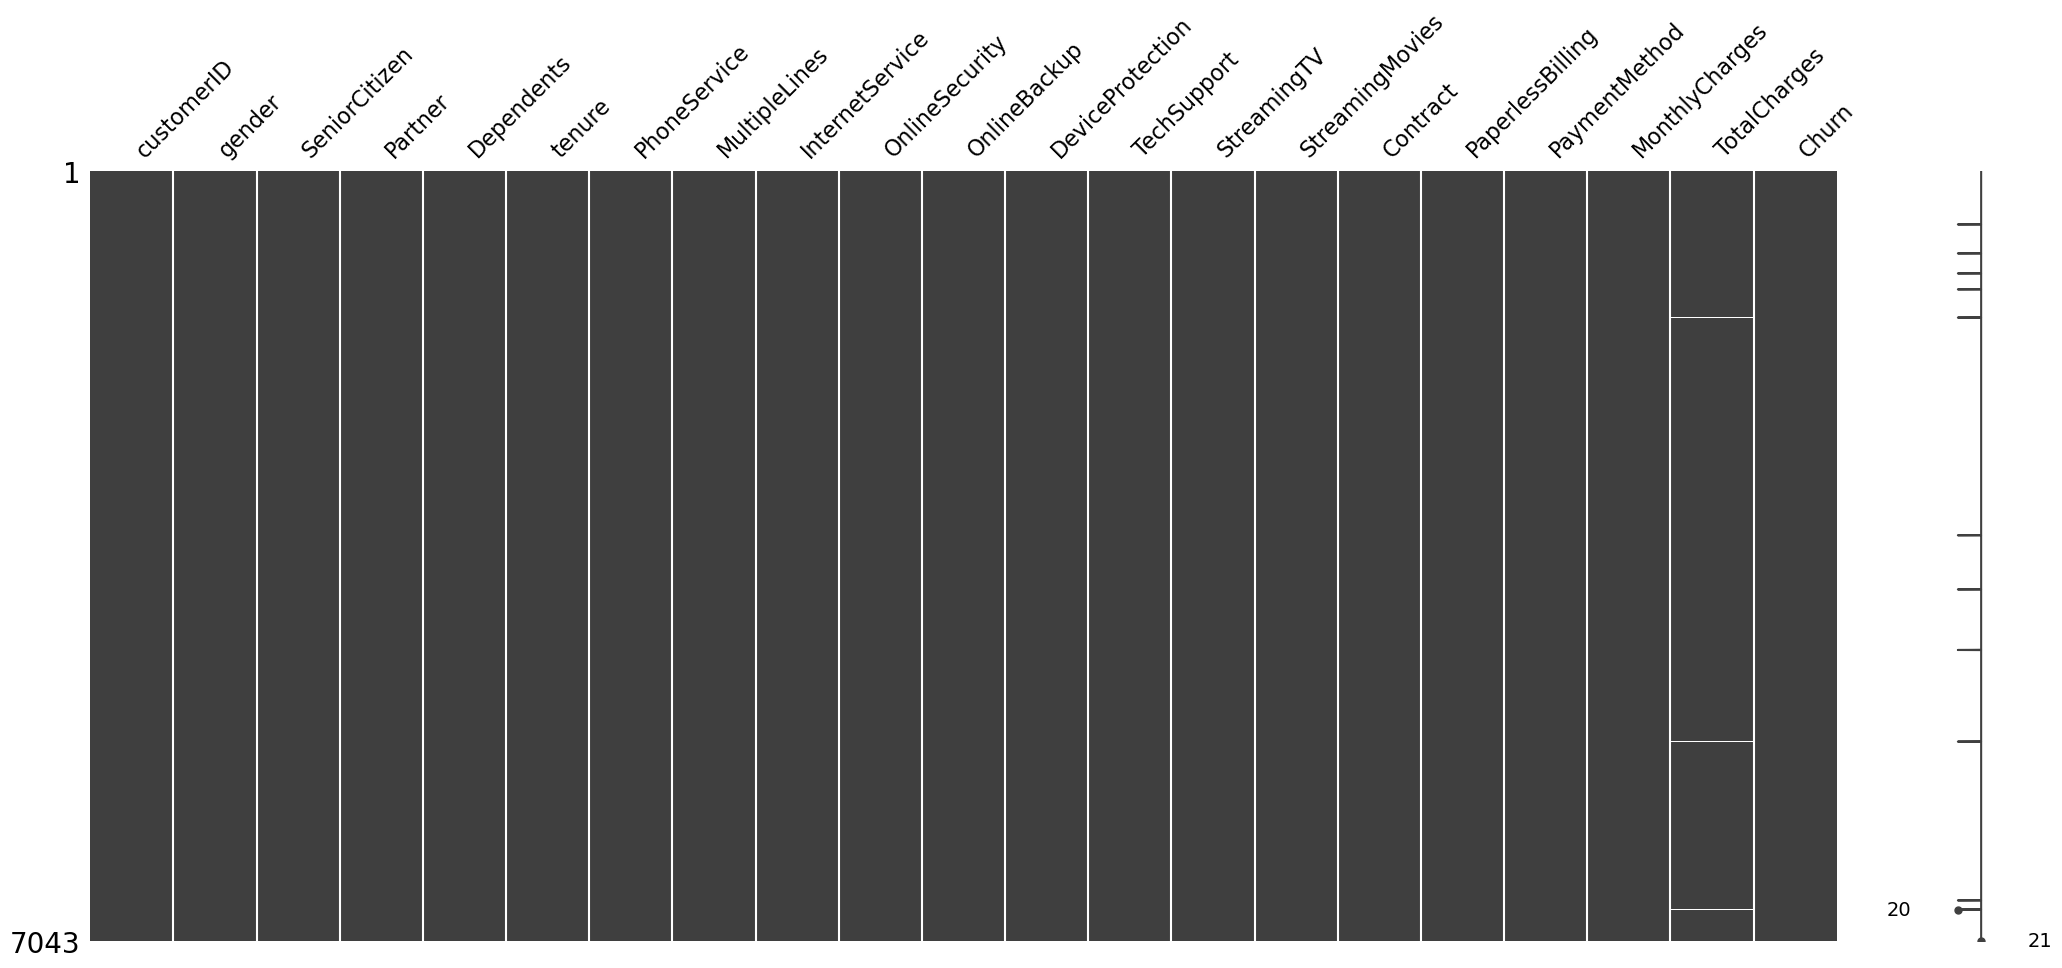

In [16]:
msno.matrix(df);

On remarque que la variable sur les frais totaux contient $0.15\%$ de valeurs manquantes 

**Analyse et Traitement des données manquantes**

L'analyse et le traitement des données manquantes suivent deux étapes essentielles :

- l'identification de la nature et du type de données manquantes.  

- une fois le type de données indentifiées, on fait le traitement. Cela consiste soit à : 
    - Supprimer les valeurs manquantes (si celle sont inférieures à $10\%$ de données contenues dans la base de données)
    - faire une inputation par la moyenne, la médiane, le mode,
    - Faire une imputation par les $k$ plus proches voisins,
    - Faire une imputation par une methode itérative baser sur l'analyse de la regression, 
    

Le traitement des données manquantes dépend du :
- Dispositif de données manquantes : structuré ou non structuré
- Mécanisme conduisant à l'apparition des données manquantes: 

    - `MAR` (Manquante Au Hasard). Cela voudrait dire que les valeurs manquantes dépendent des autres données observées mais pas des données manquantes en elle même. Cela peut aussi se traduire par le faite que, la probabilité qu’une observation soit incomplète ne dépend que de valeurs observées (pas de valeurs manquantes). Par exemple, dans le cas de notre jeu de données, la variable frais totaux peut être manquante parce que la variable frais mensuels est manquante ou encore la variable `tenure` c'est à dire le nombre temps que le client est resté dans l'entreprise est nul (nouveau client). Cela voudrait dire qu'il pourrait exister un potentiel lien entre les fraus totaux et les frais mensuels ou encore entre les frais totaux et l'entrée d'un nouveau client. 
        - Méthodes recommandées pour traiter se types de données manquantes : on utilise les techniques d'imputation telles que les `KNN`, `MissForest` ou encore la `regression`


    - `MCAR` (Manquante Complètement Au Hasard). Cela voudrait dire que les données manquantes n'ont aucune relation avec les autres données. cela peut aussi se traduire par le fait que, la probabilité qu'une information soit incomplète est constante. Par exemple dans le cas de notre base de données, la probabilité que l'age du client soit `NA` ne depend ni du sexe du client, ni des autres variables. 
        - methodes recommandées pour traiter ces données manquantes : En général dans la pratique, c'est très rare que les données soient `MCAR`. Par ailleurs, si l'on a des preuves que les données sont `MCAR` on peut décider de supprimer les observations si les proportions sont faibles (inférieur à $5\%$) ou alors de faire une imputation par la moyenne, la médiane si la variable est numérique et par le mode si elle est catégorielle. 
        
    
    - `NMAR` (Ne Manquantes pas Au Hasard). Ici, les données manquantes dépendent des valeurs en elles mêmes. Cela peut se traduire par le faite que, la probabilité qu’une observation soit incomplète dépend des valeurs non observées et de manière aléatoire. Par exemple dans le cas de ce jeu données, la variable frais totaux peut être manquante tout simplement parce que certains client ont decidé de ne pas communiquer les informations sur leurs frais totaux. Cela peut être dû à des montant élevé de ceux-ci. 
        - methodes recommandées pour traiter ces données manquantes : Tout comme les données manquantes `MAR`, pour traiter ces données, on utilse aussi les méthodes d'imputation telles que les `KNN`, `MissForest` ou encore la méthode d'itération basée sur la `regression`. 

Dans le cas de cette base de données, les données manquantes de la variable frais totaux sont `MAR` car les données manquantes de cette variable dépendent principalement de la variable `tenure` ce qui voudrait dire que l'on n'a pas encore comptabilisé le total des charges des nouveaux clients. Et de ce fait, nous allons utiliser les deux méthodes d'imputation `KNN` et la `regression`.

# KNN imputer

L'algorithme `KNNImputer` de `scikit-learn` est une méthode d'imputation des valeurs manquantes basée sur les $k$ plus proches voisins. Il s'agit d'une approche non-paramétrique qui utilise les valeurs des $k$ plus proches voisins pour imputer les valeurs manquantes.

L'algorithme fonctionne en plusieurs étapes :

1. Définir la valeur de $k$, qui représente le nombre de voisins les plus proches à considérer pour l'imputation.

2. Pour chaque valeur manquante, trouver les $k$ plus proches voisins parmi les autres observations qui ont des valeurs non manquantes pour la variable en question. La distance entre les observations peut être mesurée de différentes manières, telles que la distance euclidienne ou la distance de Manhattan.

3. Imputer la valeur manquante par la valeur moyenne ou médiane des $k$ voisins les plus proches.

Mise en application :

In [17]:
#importation des libraries necessaires
from sklearn.impute import KNNImputer 
#KNNImputer avec un nombre de voisins égale à 3
df[["TotalCharges_KNNImputer"]] = KNNImputer(n_neighbors=3).fit_transform(df[["TotalCharges"]])
df.isnull().mean()

customerID                 0.000000
gender                     0.000000
SeniorCitizen              0.000000
Partner                    0.000000
Dependents                 0.000000
tenure                     0.000000
PhoneService               0.000000
MultipleLines              0.000000
InternetService            0.000000
OnlineSecurity             0.000000
OnlineBackup               0.000000
DeviceProtection           0.000000
TechSupport                0.000000
StreamingTV                0.000000
StreamingMovies            0.000000
Contract                   0.000000
PaperlessBilling           0.000000
PaymentMethod              0.000000
MonthlyCharges             0.000000
TotalCharges               0.001562
Churn                      0.000000
TotalCharges_KNNImputer    0.000000
dtype: float64

On remarque ici que la nouvelle variables **TotalCharges_KNNImputer** a été créée et ne contient aucune données manquantes.

# IterativeImputer

L'algorithme `IterativeImputer` de `scikit-learn` est une méthode d'imputation des valeurs manquantes basée sur la régression. Il s'agit d'une approche itérative qui utilise un modèle de régression pour imputer les valeurs manquantes à chaque itération, en utilisant les autres variables pour prédire la variable manquante.

L'algorithme fonctionne en plusieurs étapes :

1. Imputer les valeurs manquantes initiales par une stratégie simple comme la moyenne, la médiane ou le mode.

2. Ensuite, le modèle de régression est ajusté pour prédire les valeurs manquantes à partir des autres variables. Cette régression peut être linéaire, non linéaire ou de tout autre type en fonction des données.

3. Les valeurs manquantes sont alors imputées à l'aide du modèle de régression.

4. Les étapes 2 et 3 sont répétées plusieurs fois jusqu'à ce que la convergence soit atteinte. La convergence est déterminée par un critère d'arrêt défini, tel que le nombre maximal d'itérations ou la convergence de la moyenne des différences entre les imputations consécutives.

Mise en pratique : 

In [18]:
#importation des libraries necessaires
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Créer un imputer avec une stratégie de 'mean'
imputer = IterativeImputer(max_iter=5, random_state=0, sample_posterior=True)
#imputation de la colonne TotalCharges
df_impute = pd.DataFrame(imputer.fit_transform(df[["TotalCharges"]]), columns=["TotalCharges_IterativeImputer"])
#concatenation au  data frame initiale
df = pd.concat([df, df_impute], axis=1)
df.isnull().mean()

customerID                       0.000000
gender                           0.000000
SeniorCitizen                    0.000000
Partner                          0.000000
Dependents                       0.000000
tenure                           0.000000
PhoneService                     0.000000
MultipleLines                    0.000000
InternetService                  0.000000
OnlineSecurity                   0.000000
OnlineBackup                     0.000000
DeviceProtection                 0.000000
TechSupport                      0.000000
StreamingTV                      0.000000
StreamingMovies                  0.000000
Contract                         0.000000
PaperlessBilling                 0.000000
PaymentMethod                    0.000000
MonthlyCharges                   0.000000
TotalCharges                     0.001562
Churn                            0.000000
TotalCharges_KNNImputer          0.000000
TotalCharges_IterativeImputer    0.000000
dtype: float64

**Afficher les statistiques descritives des différentes variables**

statistiques descritives sur les variables numériques

| Mesure | Définition | Avantages | Inconvéniants |
|-------------------|-------------------|-------------------|-------------------|
|La moyenne|Il s'agit de la somme des produits de chaque valeur et son poids dans une distribution divisée par la somme des poids des la distriution. Elle est utilisée lorsque certaines valeurs ont plus d'importance que d'autres dans un ensemble de données.|Elle est facile à calculer et largement utilisée en statistique et machine learning|Elle est très sensile aux valeurs abérrantes |
|La médiane |C'est la valeur qui sépare un ensemble de données d'une distribution en deux parties égales|Elle n'est pas sensible aux valeurs abérrantes et est utilisée pour les données asymétriques| Elle peut ne pas être représentative pour les distributions bimodales et multimodales |
| Le Mode | Il s'agit de la valeur la plus fréquement observée dans une distribution de données | Elle est très utile pour les données discrètes et catégorielles | Elle peut ne as exister, ou avoir plusieurs modes pour un ensemble de données |

In [19]:
summary = df.describe()
print(tabulate(summary, headers="keys", tablefmt = "fancy_grid", numalign="center"))

╒═══════╤══════════╤══════════════════╤════════════════╤═══════════════════════════╤═════════════════════════════════╕
│       │  tenure  │  MonthlyCharges  │  TotalCharges  │  TotalCharges_KNNImputer  │  TotalCharges_IterativeImputer  │
╞═══════╪══════════╪══════════════════╪════════════════╪═══════════════════════════╪═════════════════════════════════╡
│ count │   7043   │       7043       │      7032      │           7043            │              7043               │
├───────┼──────────┼──────────────────┼────────────────┼───────────────────────────┼─────────────────────────────────┤
│ mean  │ 32.3711  │     64.7617      │     2283.3     │          2283.3           │             2283.3              │
├───────┼──────────┼──────────────────┼────────────────┼───────────────────────────┼─────────────────────────────────┤
│ std   │ 24.5595  │      30.09       │    2266.77     │           2265            │              2265               │
├───────┼──────────┼──────────────────┼─────────

On peu très bien voir ici que les statistiques descriptives sur la variable `TotalCharges`  avant et après imputation diffère principalement au niveau de la médiane. Ce qui voudrait dire que les resultats de l'imputation n'a pas apporté une grande modification dans la distribution de cette variable. 

Statistiques descriptives sur les variables catégorielles 

In [20]:
summary = df.describe(include='O')
print(tabulate(summary, headers="keys", tablefmt = "fancy_grid", numalign="center"))

╒════════╤══════════════╤══════════╤═════════════════╤═══════════╤══════════════╤════════════════╤═════════════════╤═══════════════════╤══════════════════╤════════════════╤════════════════════╤═══════════════╤═══════════════╤═══════════════════╤════════════════╤════════════════════╤══════════════════╤═════════╕
│        │ customerID   │ gender   │ SeniorCitizen   │ Partner   │ Dependents   │ PhoneService   │ MultipleLines   │ InternetService   │ OnlineSecurity   │ OnlineBackup   │ DeviceProtection   │ TechSupport   │ StreamingTV   │ StreamingMovies   │ Contract       │ PaperlessBilling   │ PaymentMethod    │ Churn   │
╞════════╪══════════════╪══════════╪═════════════════╪═══════════╪══════════════╪════════════════╪═════════════════╪═══════════════════╪══════════════════╪════════════════╪════════════════════╪═══════════════╪═══════════════╪═══════════════════╪════════════════╪════════════════════╪══════════════════╪═════════╡
│ count  │ 7043         │ 7043     │ 7043            │ 7043  

**Répartition de la variable Churn**

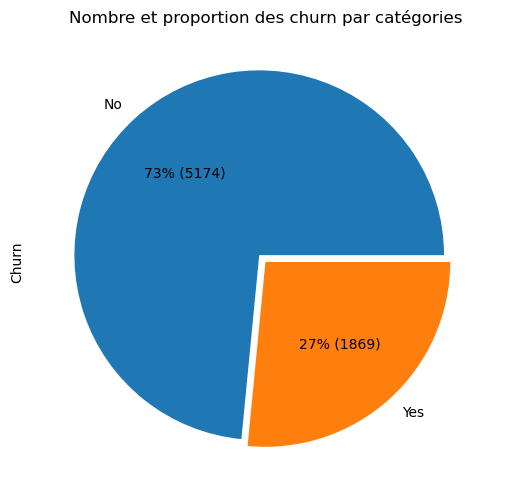

In [21]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = df["Churn"].value_counts().reset_index()
prop.columns = ["Churn", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = df["Churn"].value_counts().plot(kind = "pie", explode = (0.05,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(df):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des churn par catégories");

La variable `Churn` est repartie en deux modalités : on a $73\%$ des clients qui sont restés fidèles à l'entreprise et $27\%$ qui ont décidés de se désabonnés. A partir de là, on peut affirmer que nos classes ne sont pas équilibrées pour ce problème. Par conséquent, il faudrait des métriques comme le score `f1-score`, la sensibilité ou la précision dans la modélisation.  

**Identification des tendances des différentes variables de la base de données**

**Caractéristiques de dispersion**

Elles s'observent généralement à travers les Boxplots qui montre de quelle façon les données sont reparties autour de la médiane. A travers le Boxplot, on peut observer si la distribution d'une variable est symétrique ou asymétrique. Elles fournissent les informations sur la médiane, le maximum, le minimum, les quartiles (le premier quartile et le deuxième quartile qui est la médiane, ainsi que le troisième quartile). On peut observer si une variable possède des valeurs abérrantes ou non c'est à dire des valeurs atypiques qui s'écartent de la distribution normale des données de cette variable. Il n'existe pas d'interprétation particulère des Boxplots, mais ils sont principalement utilisés dans l'analyse univariée pour détecter les valeurs abérrantes. 

| Mesure | Définition | Utilisation |
|--------------------|--------------------|--------------------|
| La variance | Il s'agit du carré de la moyenne des écarts par rapport à la moyenne | Elle est utilisée pour mesurer la dispersion des valeurs autour de la moyenne. Plus la variance est élevé et plus les valeurs autour de la moyenne seront dispersées et plus ont aura une forte variabilité dans les données |
| L'écart type | Il s'agit de la racine carrée de la variance | Elle est utilisée pour mesurer la dispersion des valeurs autour de la moyenne dans les mêmes unités que les données. Plus l'écart type est élevé, et plus les valeurs seront dispersées |
| L'écart interquartile | Il s'agit de la différence entre le troisième quartile $Q_{3}$ et le premier quartile $Q_{1}$. | Il est utilisé pour mesurer la dispersion des valeurs autour de la médiane en éliminant l'influence des valeurs extrèmes. Plus l'intervalle interquartile sera élevé, plus les valeurs seront dispersées |

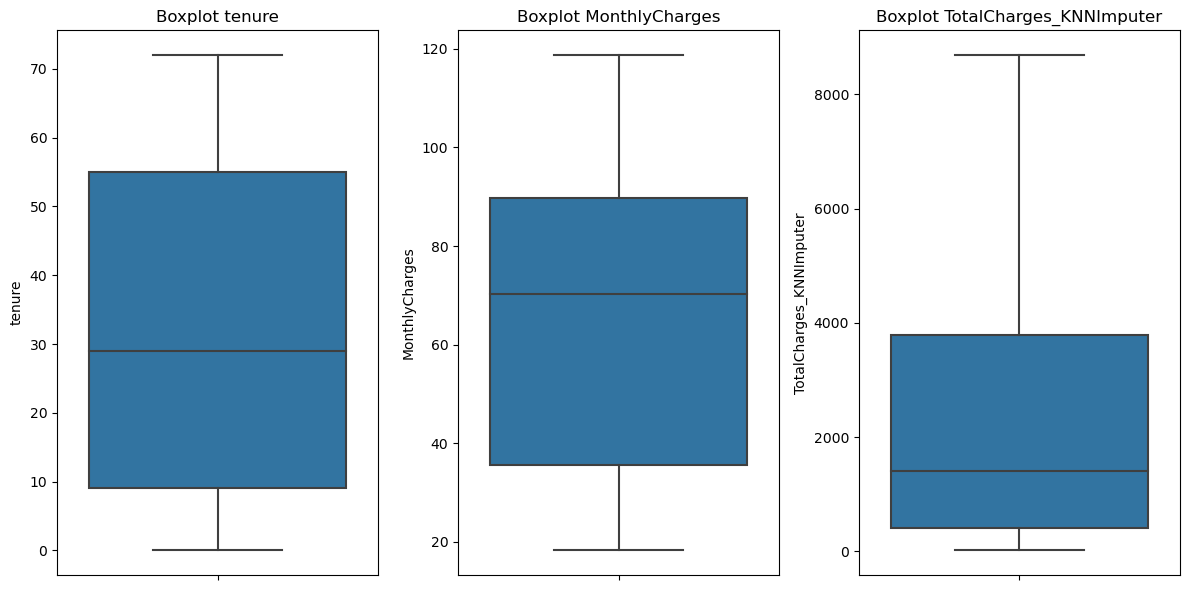

In [22]:
#création de boxplots univariés de chaque variables numériques de la base
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

df_numeric = df[["tenure", "MonthlyCharges", "TotalCharges_KNNImputer"]]
for i , col in enumerate(df_numeric):
    sns.boxplot(y = col, data = df_numeric, ax = ax[i])
    ax[i].set_title(f"Boxplot {col}")
    
plt.tight_layout();

On peut remarquer ici qu'il n'y a pas de valeurs abérrantes dans nos distributions. Toutes fois, les distributions affichées par les variables `Tenure` et `MontlyCharges` et `TotalCharges` montrent que celles ci ne sont pas symétriques. Pour avoir une confirmation sur ces resultats graphiques, nous allons étudier la normalité de ces variables à travers des analyses plus apporfondies. 

**Analyse de la normalité pour vérifier si les variables sont normalement distribuées**

Deux étapes sont necessaires pour vérifier graphiquement la normalité d'une distribution d'une variable dans une base de données : 

- L'histogramme de la distribution ou encore la densité de probabilité de cette distribution

- Le Quantile Quantile plot (QQplot) qui est un graphique affichant en abscisse les quantiles théoriques de la loi normale et en ordonnées les quantiles observées de la variable. Le QQplot permet de renseigner grahiquement si une variable est normalement distribuée. Si les données s'écartent un peu trop de la droite théorique de la loi normale, alors on peut peut présumer que la variable n'est pas normalement distribuée. 

In [23]:
# importation de package 
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

**Histogrammes et courbes de densité**

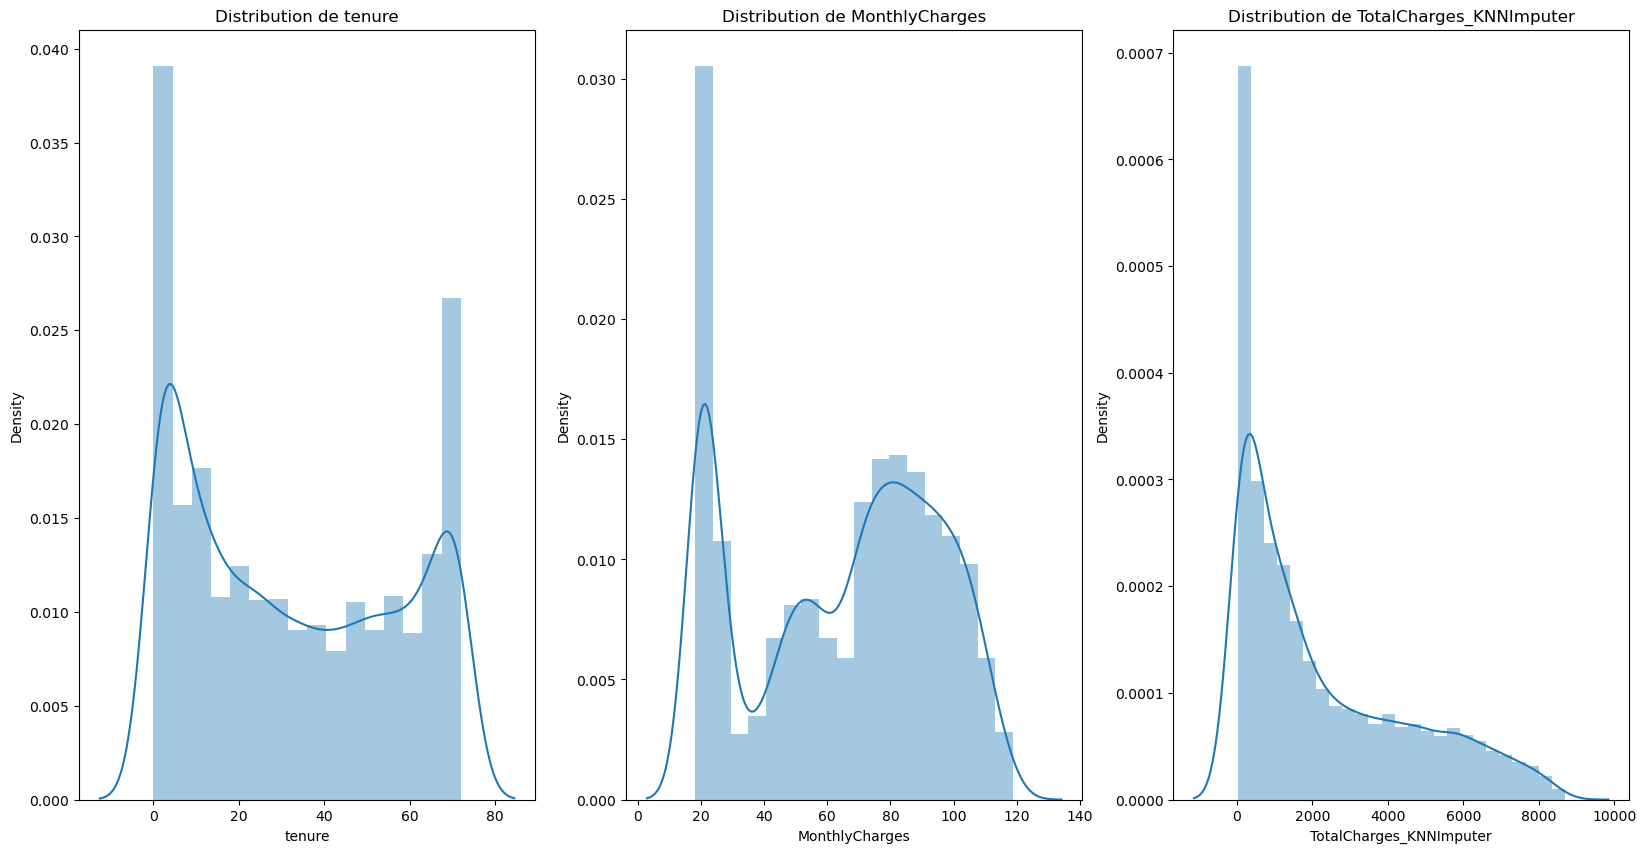

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
for i, col in enumerate(df_numeric):
    sns.distplot(df_numeric[col], ax = ax[i])
    ax[i].set_title(f"Distribution de {col}");

On peut Observer sur ces graphique que les données ne sont pas normalement distribuées car les courbes de distribution ne sont pas Gaussiennes. 

**QQplot des variables**

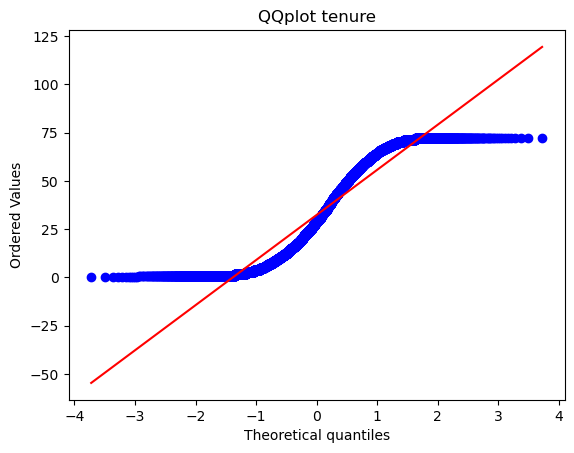

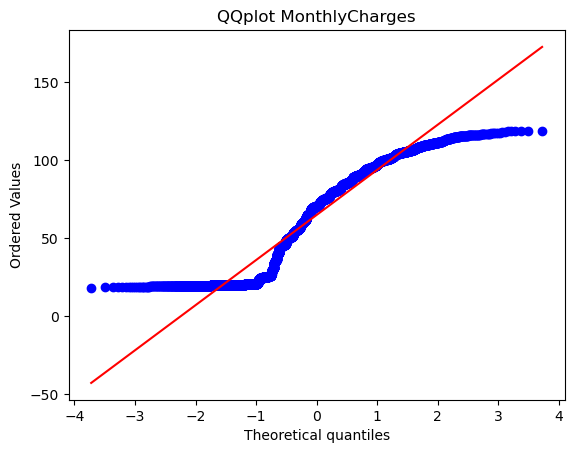

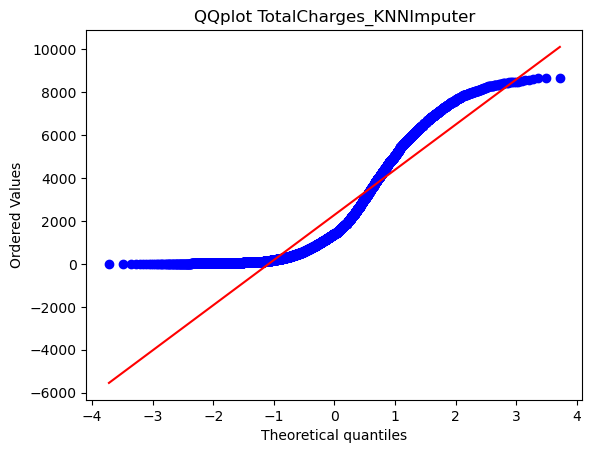

In [25]:
for col in df_numeric:
    plt.figure()
    stats.probplot(df_numeric[col], plot=plt)
    plt.title(f"QQplot {col}");

Les résultats données par les QQplots semblent confirmer l'hypothèse sur la distribution des variables. Pour mieux appuyer ces résultats, il est nécessaire d'éffectuer des tests de normamité sur les variables. 

Utilisation des tests statistiques pour vérifier la normalité

Pour tester la normalité d'une distribution, on utilise des indicateurs comme :
- le *skewness* qui permet de voir si une variable est symétrique ou non. Etant donnée que la loi normale est une loi symétrique, alors son *skewness* est de $0$. si le calcul du *skewness* d'une variable est différent de $0$, alors on peut faire l'hypothèse que cette variable n'est pas distribué suivant une loi normale. 
- le *kurtosis* quant à lui mesure l'applatissement d'une distribution. Comme la fonction de densité d'une loi normale est une courbe en cloche, alors son *kurtosis* est de $3$. Si le *kurtosis* est négative et compris entre $0$ et $3$ (pas suffisamment proche de $3$) on dit que le courbe est applatit vers droite. Et si le *kurtosis* est comprise entre $0$ et $-3$ (pas suffisamment proche de $-3$), on dit que la courbe est applatit vers la gauche.
- l'*Excès de kurtosis* donne la différence entre le kurtosis d'une loi normale et celui de la variable étudiée. Il n'a pas une interprétation particulière, mais il permet de voir la différence le *kurtosis* d'une loi normale et celui des données observées. 

In [26]:
# Calcul du skewness et du kurtosis
def skew_kurtosis(data): 
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data,fisher=False) #Vrai kurtosis
    excess_kurtosis = stats.kurtosis(data) #Vrai kurtosis
    print(f"Skewness: {skewness}")
    print(f"Kurtosis réel: {kurtosis}")
    print(f"Excès de kurtosis: {excess_kurtosis}")

In [27]:
skew_kurtosis(df_numeric["tenure"])

Skewness: 0.2394887299846216
Kurtosis réel: 1.6127613089675723
Excès de kurtosis: -1.3872386910324277


In [28]:
skew_kurtosis(df_numeric["MonthlyCharges"])

Skewness: -0.2204774644391769
Kurtosis réel: 1.7427808990618143
Excès de kurtosis: -1.2572191009381857


In [29]:
skew_kurtosis(df_numeric["TotalCharges_KNNImputer"])

Skewness: 0.962189042660014
Kurtosis réel: 2.771842060821661
Excès de kurtosis: -0.22815793917833904


Les résultats fournis par le calcul des skewness et du kurtosis montrent bien que les données ne sont pas reparties de manière symétrique. Il sera donc necessaire de confirmer ces resultats avec des tests de normalité sur ces données. 

**Tests statistiques a éffectué pour vérifier la normalité des variables.**

**Quelques rappels sur la notion de test statistique**

Il s'agit d'une mesure de la distance entre notre statistique d'échantillon, et notre paramètre de la population hypothétique en terme d'erreur standard que l'on estime.

Dans un test statistique, l'énoncé en question est ce qui constitue notre hypothèse nulle. Si elle est rejéttée, nous l'avons falsifié. Si les données que nous observons sont ambigues ou ne sont pas faiblement contradictoire, avec l'hypothèse nulle, nous ne rejettons pas cette hypothèse nulle. 

**Les deux types d'erreurs dans un test statistique**
- Une erreur de type I (faux positif), se produit lorsque l'hypothèse nulle est vrai, mais rejetté à tort c'est à dire $p(\bar{H}_{0}/H_{0})$. 
- Une erreur de type II (faux négatif), qui se produit lorque l'hypothèse nulle n'est pas rejetté alors qu'elle est en réalité fausse. $p(\bar{H}_{1}/H_{1})$ ou encore rejetté l'hypothèse alternative sachant qu'elle est vraie. 

Ces deux erreurs sont les principales propriétés des tests d'hypotèse en statistique. Une propriété complémentaire à celle-ci est la puissance du test c'est dire la probabilité de commettre l'erreur de type II.

La plus part des méthodes d'inférence statistique traditionnelles visent à contrôler strictement la probabilité d'une erreur de type I qui est généralement de $5\%$ encore appelé probabilité critique que nous allons utiliser tout au long de ce travail. 


| Test                 | Avantages                                                | Inconvénients                                         | Conditions d'utilisation                              |
|:---------------------|:---------------------------------------------------------|:------------------------------------------------------|:---------------------------------------------------|
| Shapiro-Wilk         | - Puissant et précis<br>- Recommandé pour les échantillons de petite taille | - Moins adapté aux grands échantillons  | - Échantillons de petite et moyenne taille           |
| Kolmogorov-Smirnov   | - Peut être utilisé pour des échantillons plus importants | - Moins puissant que le test de Shapiro-Wilk         | - Échantillons de toutes tailles                     |
| Lilliefors           | - Adapté aux échantillons de petite taille               | - Moins précis et puissant que le test de Shapiro-Wilk| - Échantillons de petite taille                      |
| Anderson-Darling     | - Sensible aux écarts dans les queues de la distribution  | - Peut être moins puissant pour les échantillons de petite taille | - Échantillons de toutes tailles                     |
| D'Agostino-Pearson   | - Détecte les asymétries et variations d'aplatissement   | - Moins puissant que le test de Shapiro-Wilk         | - Échantillons de toutes tailles                     |



In [30]:
def normal_test(alpha, data):
 # Effectuer les tests de normalité
    shapiro_test = stats.shapiro(data)
    ks_test = stats.kstest(data, 'norm')
    ad_test = stats.anderson(data, dist='norm')
    dagostino_test = stats.normaltest(data)
    lilliefors_test = lilliefors(data, dist='norm')

    # Créer un tableau pandas avec les résultats des tests
    test_results = pd.DataFrame({
        'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
        'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
        'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
        'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                    'Oui' if ks_test.pvalue > alpha else 'Non',
                    'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                    'Oui' if dagostino_test.pvalue > alpha else 'Non',
                    'Oui' if lilliefors_test[1] > alpha else 'Non']
    })

    print(test_results);

In [31]:
print(normal_test(0.05, df_numeric["tenure"]))

          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.903751     0.000       Non
1  Kolmogorov-Smirnov             0.888651     0.000       Non
2    Anderson-Darling           203.235471       NaN       Non
3  D'Agostino-Pearson         76258.505174     0.000       Non
4          Lilliefors             0.111016     0.001       Non
None


In [32]:
print(normal_test(0.05, df_numeric["MonthlyCharges"]))

          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.920889     0.000       Non
1  Kolmogorov-Smirnov             1.000000     0.000       Non
2    Anderson-Darling           170.555235       NaN       Non
3  D'Agostino-Pearson         11419.528789     0.000       Non
4          Lilliefors             0.126195     0.001       Non
None


In [33]:
print(normal_test(0.05, df_numeric["TotalCharges_KNNImputer"]))

          Nom du test  Statistique de test       p-valeur Normalité
0        Shapiro-Wilk             0.860750   0.000000e+00       Non
1  Kolmogorov-Smirnov             1.000000   0.000000e+00       Non
2    Anderson-Darling           344.441081            NaN       Non
3  D'Agostino-Pearson           807.331651  4.899586e-176       Non
4          Lilliefors             0.158709   1.000000e-03       Non
None


 On peut constater qu'aucun de ces tests n'est significatif. Cela vient confirmer les hypothèses qui ont été émises dans les analyses graphiques sur la vérification de la normalité. Comme les données ne sont pas normalement distribuées, cela nous renseigne sur les différents types de tests non paramétriques à éffectuer dans les analyses bivariées.

## Analyse Descritive Bivariée

Dans cette partie, il sera question de : 
- faire des analyses de corrélation entre les variables quantitatives
- Effectuer des tests de corrélation entre les variables quantitatives
- 

In [34]:
# Importation du package
import scipy.stats as st

#### Analyse de la liaison entre deux variables quantitatives

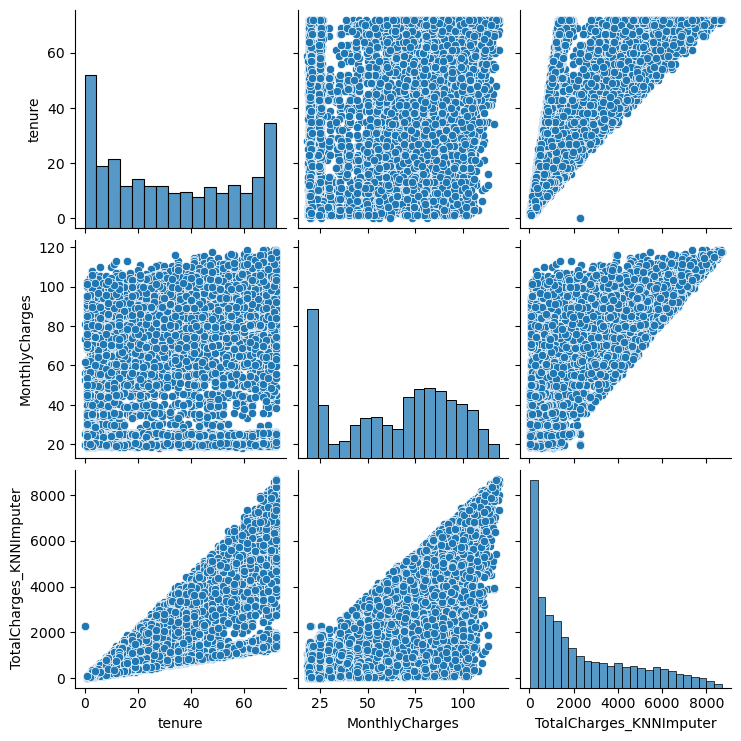

In [35]:
sns.pairplot(df[["tenure", "MonthlyCharges", "TotalCharges_KNNImputer"]]);

Matrice de correlation 

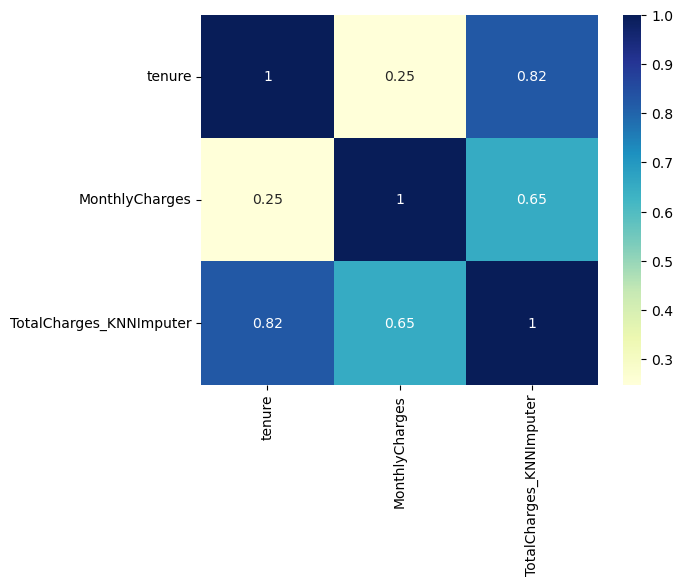

In [36]:
# Obtenir le tableau de corélation et la heatmap
corr_matrix = df_numeric[["tenure", "MonthlyCharges", "TotalCharges_KNNImputer"]].corr()
# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu");

Avec cette matrice de corrélation, on peut observer un forte correlation entre le total des charges et la titularisation c'est à dire le nombre de mois que le client est resté dans l'entreprise. On peut donc dire qu'il existe une liaison linéaire positive entre le total de charge et la durée du client dans l'entreprise. Par contre, on observe une faible correlation entre les frais mensuelles et la durée du client dans l'entreprise et une corrélation positive entre frais mensuelles et le total de charges supportées par le client. Pour appuyer ces élements certains tests de corrélation sont nécessaires. Maintenant, il est necessaire de voir si c'est corrélation observées sont significatif c'est à dire si elle sont vrai avec un certains niveau de fiabilité. 



#### Test de corrélation de Pearson

##### Hypothèses :
- $H_{0}$ (hypothèse nulle) : Il n'y a pas de corrélation **linéaire** entre les deux variables.
- $H_{1}$ (hypothèse alternative) : Il y a une corrélation **linéaire** entre les deux variables.

##### Conditions d'utilisation :
- Les deux variables sont quantitatives et mesurées sur une échelle continue.
- La relation entre les deux variables est linéaire
- Les deux variables suivent une **distribution normale**.


##### Interprétation :
Le coefficient de corrélation de pearson varie entre -1 et 1. 

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation linéaire entre les variables.


Vous pouvez aussi regarder la $p-valeur$ du test qui represente le sueil de singificativité en dessous du quel l'hypothèse $H_{0}$ n'est pas valide:

- Si $p < 0.05$, on rejette H0 et on conclut qu'il y a une corrélation significative entre les deux variables.
- Si $p \geq 0.05$, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation significative entre les deux variables.



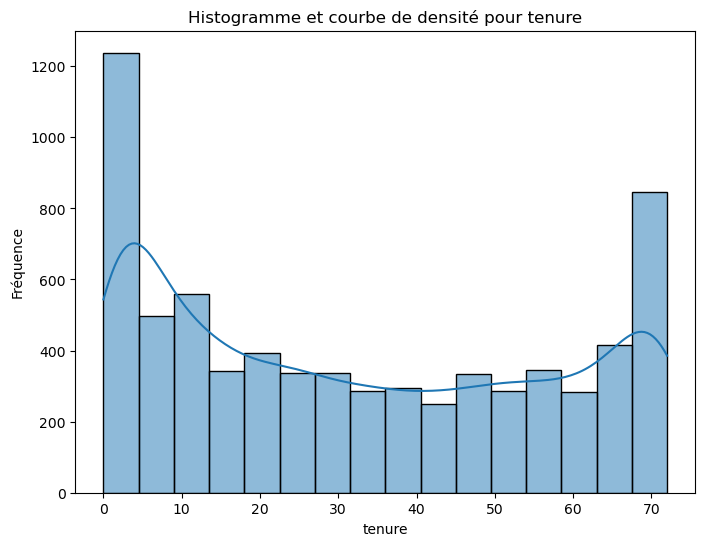

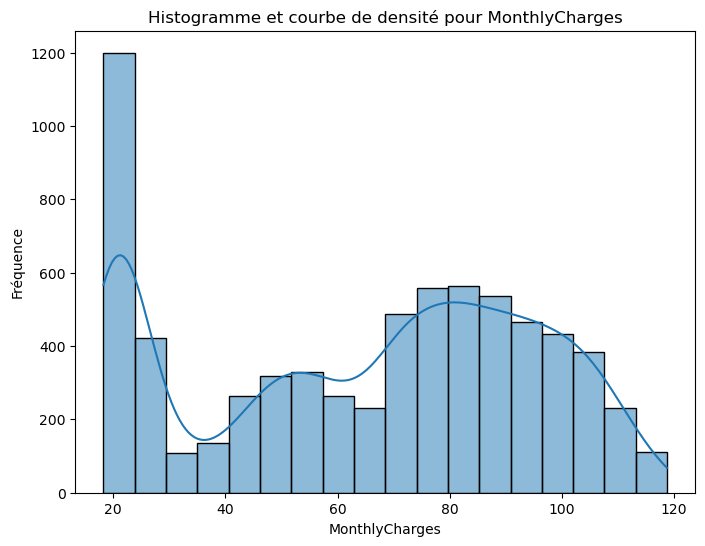

P-valeur de la normalité (Shapiro-Wilk) pour tenure: 0.0
P-valeur de la normalité (Shapiro-Wilk) pour MonthlyCharges: 0.0


In [37]:
# Analyse de la normalité grâce au test de shapiro
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
# Variables quantitatives d'intérêt
var1 = "tenure"
var2 = "MonthlyCharges"
var3 = "TotalCharges_KNNImputer"

# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_numeric[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in [var1, var2]:
    _, p_value = shapiro(df_numeric[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)



In [38]:
# Calculer du coefficient de corrélation de Spearman
pearsonr(df_numeric[var1], df_numeric[var2])

PearsonRResult(statistic=0.24789985628615008, pvalue=4.0940449915016345e-99)

In [39]:
# Calculer du coefficient de corrélation de Spearman
pearsonr(df_numeric[var1], df_numeric[var3])

PearsonRResult(statistic=0.8247573156351038, pvalue=0.0)

In [40]:
# Calculer du coefficient de corrélation de Spearman
pearsonr(df_numeric[var3], df_numeric[var2])

PearsonRResult(statistic=0.6504680404415563, pvalue=0.0)

On peut conclure que la corrélation entre la durée du client dans l'entrprise et ces frais mensuels est faible mais statistiquement significative. Ce qui voudrait dire qu'il existe un faible lien mais suffisamment significatif entre le temps mis par un client dans l'entreprise et les dépenses qu'il effectue chaque mois sur son compte. 

par contre, il existe une corrélation forte, et significative entre les frais totaux du client et ces frais mensuelles ($p-value = 0.0$). Il en ait de même pour la durée du client dans l'entrprise et ces frais totaux. 

#### Corrélation de Spearman

##### Hypothèses :
- $H_{0}$ : Il n'y a pas de corrélation **monotone** entre les deux variables.
- $H_{1}$ : Il y a une corrélation monotone entre les deux variables.

##### Conditions d'utilisation :
- Les deux variables sont quantitatives ou **ordinales**.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).



##### Interprétation :
Le coefficient de corrélation de Spearman varie entre -1 et 1. 

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de  **corrélation monotone (linéaire ou non linéaire)** entre les variables.


Vous pouvez aussi regarder la pvaleur du test:

- Si $p < 0.05$, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si $p \geq 0.05$, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.

In [41]:
# Corrélation de spearman
spearmanr(df_numeric[var1], df_numeric[var2])

SpearmanrResult(correlation=0.27641678933130215, pvalue=1.0271266876409408e-123)

Le coefficient de corrélation de spearman entre le temps mis par le client dans l'entreprise et ces frais mensuels est faible mais statistiquement significatif ($pvalue=1.02e-123$).

In [42]:
spearmanr(df_numeric[var1], df_numeric[var3])

SpearmanrResult(correlation=0.8856588831426752, pvalue=0.0)

Le coefficient de corrélation de spearman entre le temps mis par le client dans l'entreprise et ces frais totaux est élevé et statistiquement significatif ($pvalue = 0.0$). On peut donc conclure qu'il existe réellement une relation linéaire et significative ente les variables `tenure` et `TotalCharges`

In [43]:
spearmanr(df_numeric[var2], df_numeric[var3])

SpearmanrResult(correlation=0.6370345226906468, pvalue=0.0)

Le coefficient de corrélation de spearman entre les frais totaux  de les frais mensuels est élevé et statistiquement significatif ($pvalue = 0.0$). On peut donc conclure qu'il existe réellement une relation linéaire et significative ente les variables `MonthlyCharges` et `TotalCharges`

##### Test de corrélation de Kendall

##### Hypothèses :
- $H_{0}$ : Il n'y a pas de **corrélation monotone** entre les deux variables.
- $H_{1}$ : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).


##### Interprétation :

Le coefficient de corrélation de Kendall varie entre -1 et 1. 
- Si le coefficient est proche de 1 (un seuil à 70%) , il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1, il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone entre les variables



- Si $p < 0.05$, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si $p \geq 0.05$, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.


In [44]:
# Calcul de la corrélation de kendall
kendalltau(df_numeric[var1], df_numeric[var2])

KendalltauResult(correlation=0.1905648681169637, pvalue=2.804062588122534e-124)

Ici, le test de significativité de la corrélation de Kendal montre que la corrélation entre le temps mis par le client dans l'entreprise et les frais mensuels du client n'est pas suffisament monotone. Par contre elle est significative

### Analyse de la liaison entre deux variables qualitatives

Dans cette partie, nous allons explorer différents tests **d'association** pour étudier la relation entre deux variables qualitatives. Nous utiliserons les tests du chi-carré (chi2) et de Cramér-V. Nous utiliserons le jeu de données pour démontrer l'application de ces tests en Python.


## Test du chi-carré (chi2)

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.


## Coefficient de Cramér-V

Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.

### Interprétation
Plus la valeur de **Cramér-V est proche de 1 (supérieur à 0.60)**, plus l'association entre les deux variables est forte.

ON peut conclure ici que l'association entre le sexe du client et le nombre de désabonnement n'est pas significative. 

## Coefficient T de Tschuprow

Le coefficient T de Tschuprow est une mesure de liaison entre deux variables qualitatives. Il est basé sur le chi-carré (χ²) et prend en compte la taille de l'échantillon et le nombre de catégories dans chaque variable.

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

### Conditions d'utilisation
- Les variables sont qualitatives.
- Les observations sont indépendantes.
- Les effectifs des cellules du tableau de contingence sont suffisants (généralement, chaque cellule doit avoir un effectif d'au moins 5).

### Interprétation
Le coefficient T de Tschuprow varie entre 0 et 1. Une valeur proche de 0 indique une faible liaison entre les deux variables, tandis qu'une valeur proche de 1 indique une liaison forte. La force de la liaison dépend du contexte et de la discipline, mais en général, une valeur supérieure à 0,3 est considérée comme une liaison modérée et une valeur **supérieure à 0,5 est considérée comme une liaison forte**.

**Calcul des différents tests pour étudier la liaison entre le nombre de désabonnement des clients et les variables qualitatives liées aux caractéristiques des clients**

In [45]:
# Calcul de chi deux sur la base de données
from scipy.stats import chi2_contingency

def tests_varqual(data1, data2):
    # Créer un graphique de la relation entre le nombre de desabonnement et la variable selectionnée
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=data1, hue=data2)
    plt.xlabel(f'{data1.name}')
    plt.title(f'Relation entre le nombre de Churn et la variable {data1.name}')
    plt.show()
    
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(data1, data2)
    print("matice de contingence (Frequences observées)")
    print(contingency_table)
    print("\n")
    # Effectuer le test du chi-carré
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    # Afficher les résultats
    print("Fréquences attendues :\n", expected_freq)
    print("\n")
    print("Statistique du chi-carré :", chi2_stat)
    print("P-valeur :", p_value)
    print("Degrés de liberté :", dof)
    
    
    # Calculer le coefficient de Cramér-V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))

    # Afficher le coefficient de Cramér-V
    print("Coefficient de Cramér-V :", cramer_v)
    print("\n")
    
    # Calculer le coefficient T de Tschuprow
    n = df.shape[0]
    min_dim = min(contingency_table.shape) - 1
    # Effectuer le test du chi-carré
    chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))

    print("Coefficient T de Tschuprow :", tschuprow_t)
    print("P-valeur :", p_value)

Etude de la liaison entre le sexe le nombre de désabonnement par le test du khi-2

**Relation entre les variables `Churn` et `gender`**

Graphiquement, on peut voir que la proportion du nombre de desabonnement chez les hommes est le même chez les femmes. De plus les fréquences observées (matrice de contingence) et les fréquences attendues ne sont pas très différentes. Ce qui laisser présumé l'hypothèse d'indépendance entre la variable `Churn` et la variable `gender`.

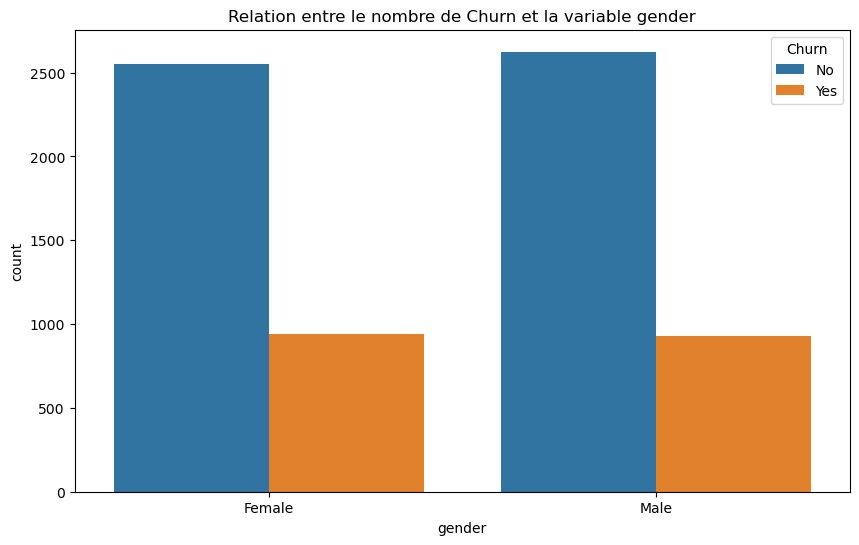

matice de contingence (Frequences observées)
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


Fréquences attendues :
 [[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


Statistique du chi-carré : 0.4840828822091383
P-valeur : 0.48657873605618596
Degrés de liberté : 1
Coefficient de Cramér-V : 0.008290505631771371


Coefficient T de Tschuprow : 0.008290505631771371
P-valeur : 0.48657873605618596


In [46]:
tests_varqual(df['gender'], df['Churn'])

Les resultats des tests d'indépendance nous permettent de ne pas rejétter l'hypothèse $H_{0}$ sur la dépendance entre ces deux variables. De ce fait, on peut conclure qu'il n'existe pas une association significative entre le sexe du client et si ce dernier c'est désabonné ou non ($p-value > 0.05$ pour le test du khi-2, le coefficient de Cramér-V et le coefficient de T de Tschuprow). Cela vient bien évidemment confirmer les resultats observés graphiquements dans les données. On peut donc conclure que, le sexe du client n'influence pas le client sur son désabonnement ou non dans l'entreprise.

**Etude de la liaison entre le fait que le client soit plus âgé et le désabonnement.** 

Le graphique ci dessous nous montre qu'il existe une différence entre la maturité du client et le desabonnement de ce dernier. On peut donc présumer que les clients âgés ont très peu de chance de se désabonner de l'entreprise. Il serait necessaire de vérifier cette hypothèse à travers des tests d'indépendances. 

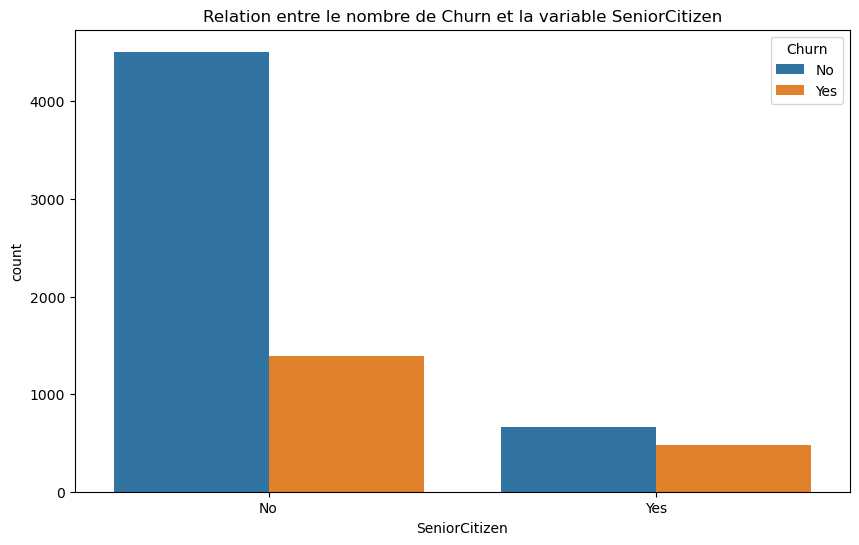

matice de contingence (Frequences observées)
Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476


Fréquences attendues :
 [[4335.05239245 1565.94760755]
 [ 838.94760755  303.05239245]]


Statistique du chi-carré : 159.42630036838742
P-valeur : 1.510066805092378e-36
Degrés de liberté : 1
Coefficient de Cramér-V : 0.15045309974200427


Coefficient T de Tschuprow : 0.15045309974200427
P-valeur : 1.510066805092378e-36


In [47]:
tests_varqual(df['SeniorCitizen'], df['Churn'])

Les résultats des tests confirment bien évidemment les observations graphiques. Ces resultats nous permettent de rejetter l'hypothèse $H_{0}$. On peut donc conclure que les deux variables seront dépendantes c'est dire que la maturité du client à une influence sur le fait que ce dernier reste dans l'entreprise ou se désabonne dans l'entreprise. Par conséquent, on peut conclure que, plus le client sera âgé, et plus il sera fidèle à l'entreprise. Cela peut s'observer dans la réalité, car les plus âgés présentent moins de chance de changer leur habitude de consommation que les plus jeunes.

**etude de la relation entre le fait que le client ait un partenaire ou non et le désabonnement.**

Les observations graphiques nous montrent une très grande différence entre la proportion des clients qui ont un partenaire et qui sont resté abonnés et les clients qui n'ont pas de partenaire et qui se sont désabonnées. Et donc on peut dire presumé qu'il existe une relation entre le statut matrimonial et son abonnement dans l'entreprise. 

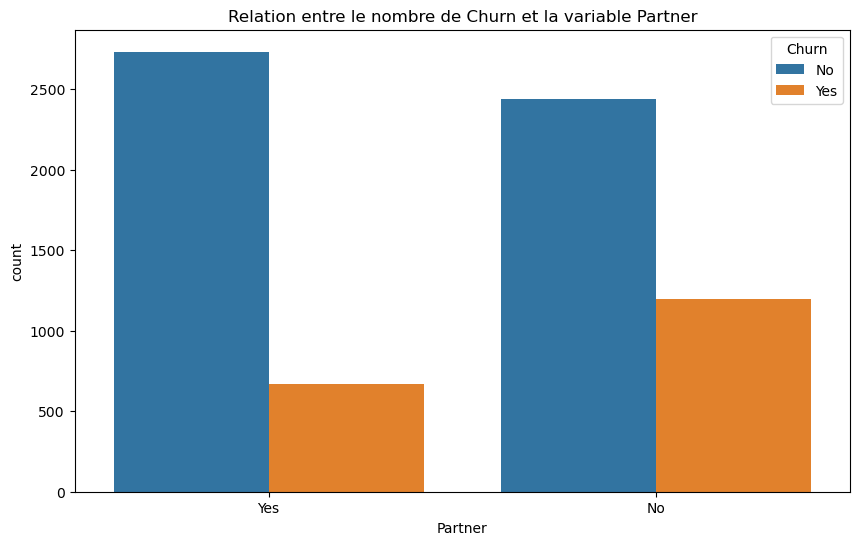

matice de contingence (Frequences observées)
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


Fréquences attendues :
 [[2674.78830044  966.21169956]
 [2499.21169956  902.78830044]]


Statistique du chi-carré : 158.7333820309922
P-valeur : 2.1399113440759935e-36
Degrés de liberté : 1
Coefficient de Cramér-V : 0.15012578474988478


Coefficient T de Tschuprow : 0.15012578474988478
P-valeur : 2.1399113440759935e-36


In [48]:
tests_varqual(df['Partner'], df['Churn'])

A partir de ces resultats, on ne peut pas rejetter l'hypothèse $H_{0}$ et donc on conclut que les deux variables sont dépendantes. Par conséquent, le statut matrimonial du client à une influence sur le désabonnement de ce dernier. 

**Etude de la liaison entre les variables `le client a des personnes à charge` et `le de désabonnement`**

On peut remarquer graphiquement que la proportion des clients qui n'ont pas de personnes en charge et qui ont tendance à rester fidèle à l'entreprise est supérieur à celle des clients qui ont des personnes à leur charge et qui sont restés fidèle. De même, on constate que la proportion des clients qui n'ont pas de personnes en charge et qui se sont désabonnés est superieure à celle des clients qui ont des persones en charge et qui se sont désabonnés ausi. On peut donc présumer qu'il existe une relation entre les charges d'un client et son dasabonnement dans l'entreprise.  

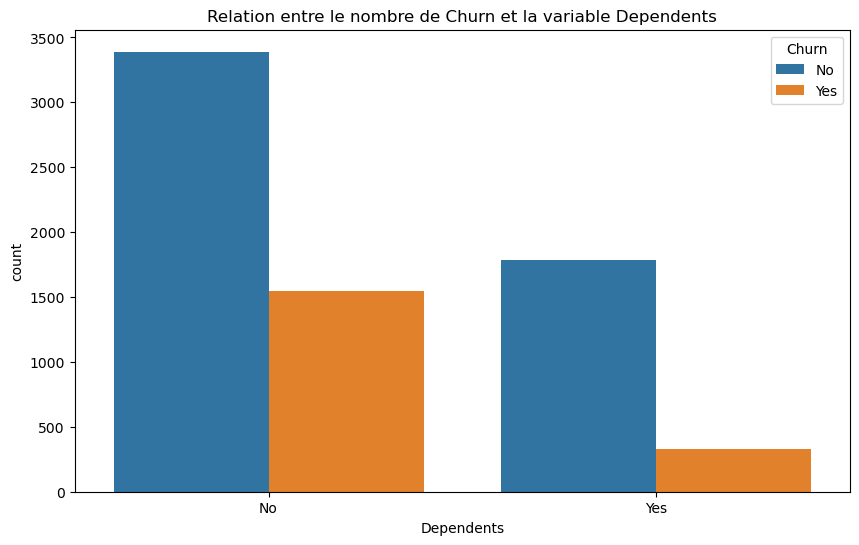

matice de contingence (Frequences observées)
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


Fréquences attendues :
 [[3623.93042737 1309.06957263]
 [1550.06957263  559.93042737]]


Statistique du chi-carré : 189.12924940423474
P-valeur : 4.9249216612154196e-43
Degrés de liberté : 1
Coefficient de Cramér-V : 0.1638703967886369


Coefficient T de Tschuprow : 0.1638703967886369
P-valeur : 4.9249216612154196e-43


In [49]:
tests_varqual(df['Dependents'], df['Churn'])

Les $p-values$ étant significative, on va rejetter l'hypothose $H_{0}$ sur l'indépendance entre ces deux variables et conclure qu'il existe une relation entre les clients ayant des personnes à leur charge et le désabonnement de ce dernier.

**Etude de la liaison entre les variables `Le client dispose-t-il d'un service téléphonique ou non (oui, non) ?` et `nombre de désabonnement`**

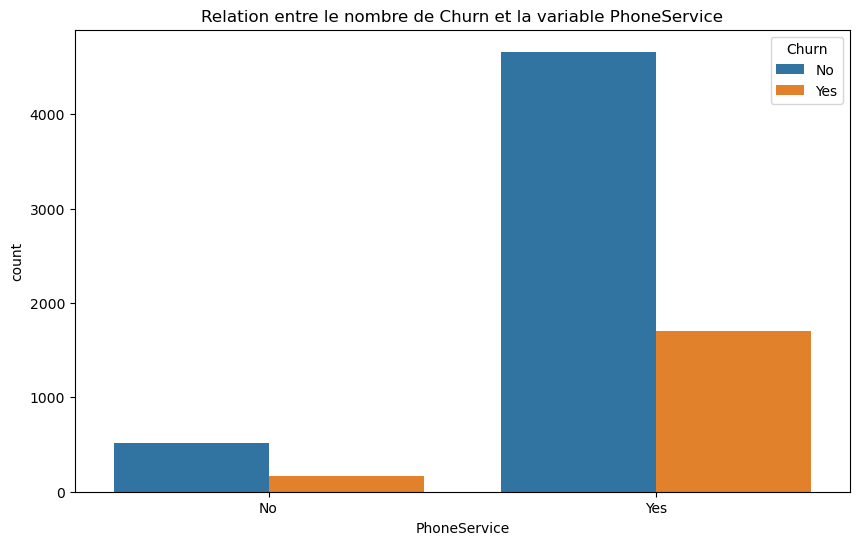

matice de contingence (Frequences observées)
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


Fréquences attendues :
 [[ 501.01774812  180.98225188]
 [4672.98225188 1688.01774812]]


Statistique du chi-carré : 0.9150329892546948
P-valeur : 0.3387825358066928
Degrés de liberté : 1
Coefficient de Cramér-V : 0.011398285522718045


Coefficient T de Tschuprow : 0.011398285522718045
P-valeur : 0.3387825358066928


In [50]:
tests_varqual(df['PhoneService'], df['Churn'])

Ici, les tests ne sont pas significatifs, on peut conclure qu'il n'existe pas de lien entre le fait que le client dispose d'un numéro de service et le desabonnement. 

**Etude de la liaison entre les variables : `le client dispose-t-il de plusieurs lignes ou non (oui, non, pas de service téléphonique) ?` et `nombre de désabonnement`**

Pour les clients qui sont restés abonner à l'entreprise, ceux qui non pas plusieurs numéros de service ont une proportion plus élevé que ceux ayant plusieurs numeros de service et ceux n'ayant pas de numéros de service. Par contre pour les clients qui se sont désabonnés, on constate que la proportion des clients qui ont plusieurs lines de service est plus élevée que celle des clients qui n'ont pas plusieurs lines de service ainsi que des clients qui n'ont pas de service. On peut donc présumer qu'il existe une relation entre fait que le client possède une ou plusieurs lines de services et son désabonnement.

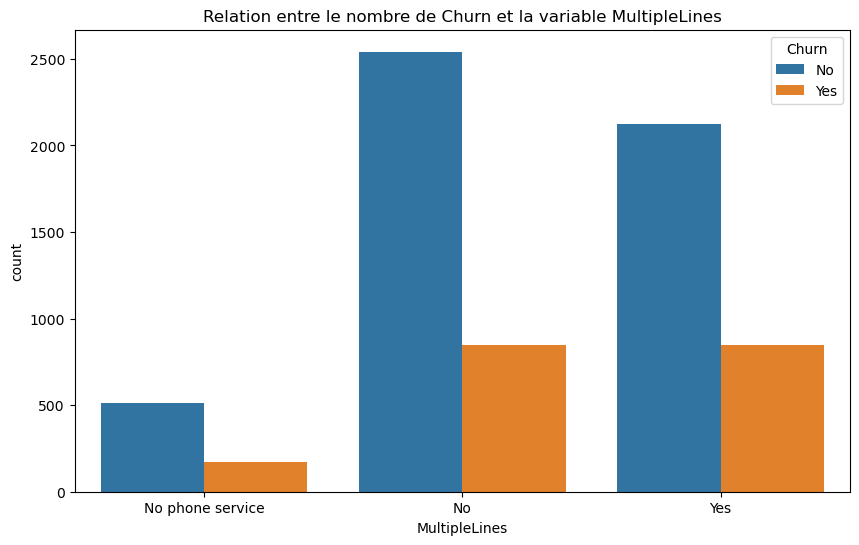

matice de contingence (Frequences observées)
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


Fréquences attendues :
 [[2490.39613801  899.60386199]
 [ 501.01774812  180.98225188]
 [2182.58611387  788.41388613]]


Statistique du chi-carré : 11.33044148319756
P-valeur : 0.0034643829548773
Degrés de liberté : 2
Coefficient de Cramér-V : 0.04010925283378871


Coefficient T de Tschuprow : 0.04010925283378871
P-valeur : 0.0034643829548773


In [51]:
tests_varqual(df['MultipleLines'], df['Churn'])

Les $p-values$ étant significatif, on peut conclure qu'il existe relation entre le fait que le client dispose de plusieurs line de service et le désabonnement. 

**Etude de la liaison entre les variables : `Fournisseur d'accès à l'internet du client (DSL, fibre optique, non)` et `nombre de désabonnement`**

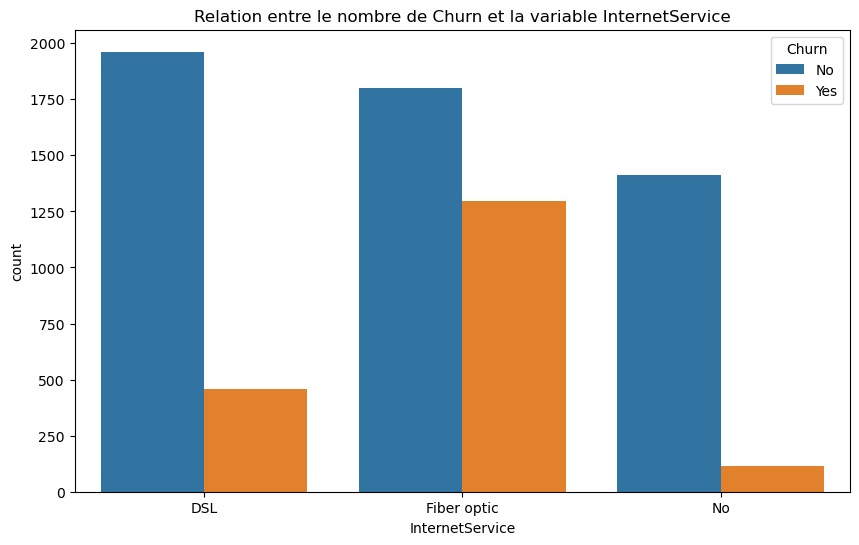

matice de contingence (Frequences observées)
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


Fréquences attendues :
 [[1778.53954281  642.46045719]
 [2274.41488002  821.58511998]
 [1121.04557717  404.95442283]]


Statistique du chi-carré : 732.309589667794
P-valeur : 9.571788222840544e-160
Degrés de liberté : 2
Coefficient de Cramér-V : 0.32245455521230887


Coefficient T de Tschuprow : 0.32245455521230887
P-valeur : 9.571788222840544e-160


In [52]:
tests_varqual(df['InternetService'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il ou non d'une sécurité en ligne (oui, non, pas de service internet) ?` et `nombre de désabonnement`

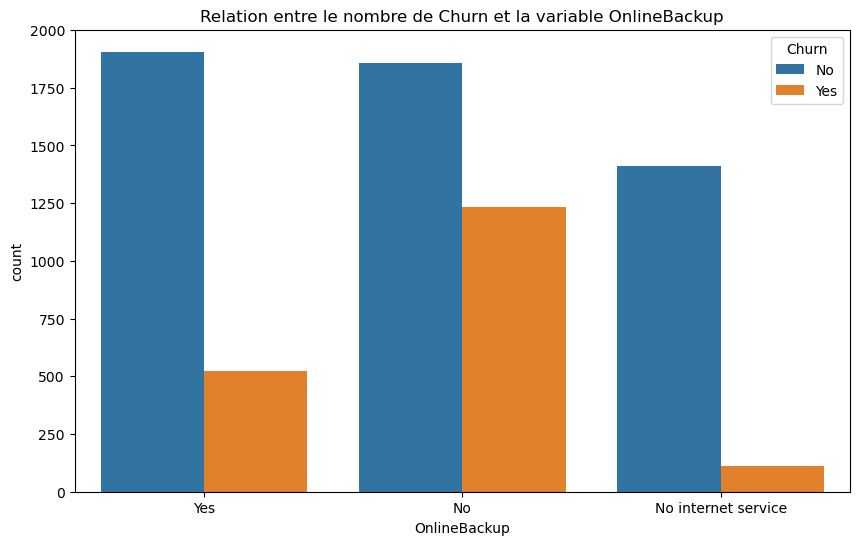

matice de contingence (Frequences observées)
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


Fréquences attendues :
 [[2268.53783899  819.46216101]
 [1121.04557717  404.95442283]
 [1784.41658384  644.58341616]]


Statistique du chi-carré : 601.812790113409
P-valeur : 2.0797592160864276e-131
Degrés de liberté : 2
Coefficient de Cramér-V : 0.2923155121954445


Coefficient T de Tschuprow : 0.2923155121954445
P-valeur : 2.0797592160864276e-131


In [53]:
tests_varqual(df['OnlineBackup'], df['Churn'])

Etude de la liaison entre les variables : `Si le client dispose ou non d'une protection des appareils (oui, non, pas de service internet)` et `nombre de désabonnement`

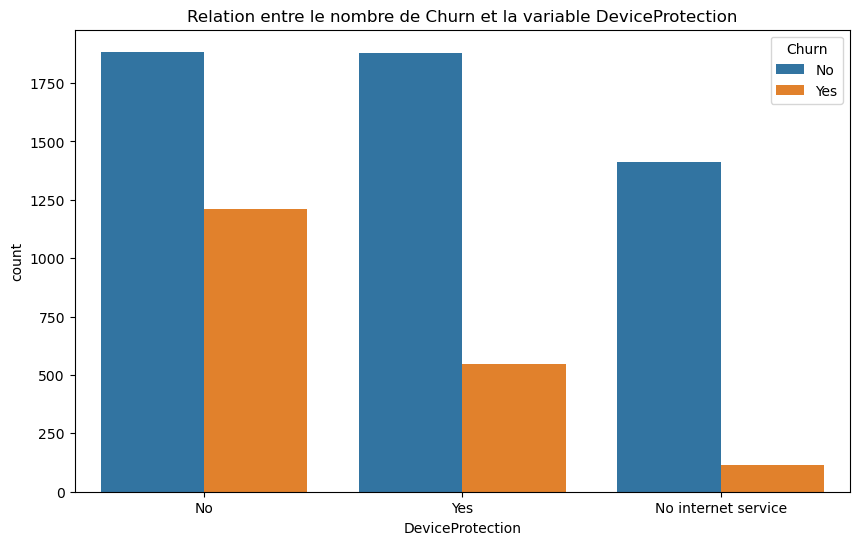

matice de contingence (Frequences observées)
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


Fréquences attendues :
 [[2273.68024989  821.31975011]
 [1121.04557717  404.95442283]
 [1779.27417294  642.72582706]]


Statistique du chi-carré : 558.419369407389
P-valeur : 5.505219496457244e-122
Degrés de liberté : 2
Coefficient de Cramér-V : 0.281579732968073


Coefficient T de Tschuprow : 0.281579732968073
P-valeur : 5.505219496457244e-122


In [54]:
tests_varqual(df['DeviceProtection'], df['Churn'])

Etude de la liaison entre les variables : `Si le client dispose ou non d'une assistance technique (Oui, Non, Pas de service internet)` et `nombre de désabonnement`

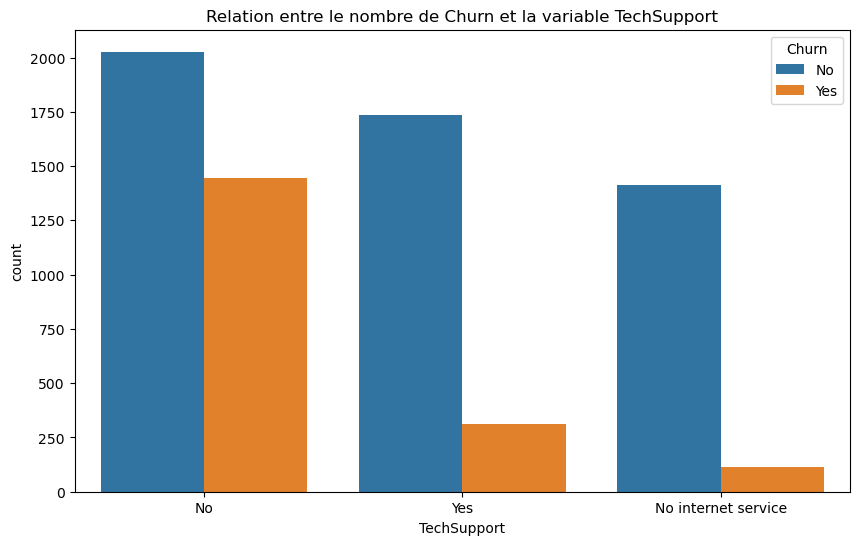

matice de contingence (Frequences observées)
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


Fréquences attendues :
 [[2551.37043873  921.62956127]
 [1121.04557717  404.95442283]
 [1501.5839841   542.4160159 ]]


Statistique du chi-carré : 828.1970684587394
P-valeur : 1.4430840279998987e-180
Degrés de liberté : 2
Coefficient de Cramér-V : 0.3429161982469257


Coefficient T de Tschuprow : 0.3429161982469257
P-valeur : 1.4430840279998987e-180


In [55]:
tests_varqual(df['TechSupport'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il ou non d'un service de télévision en continu (oui, non, pas de service internet) ?` et `nombre de désabonnement`

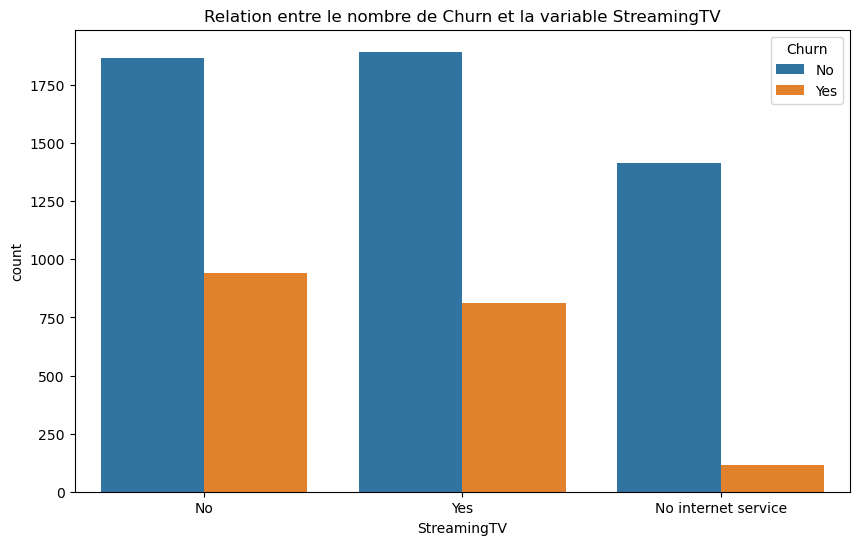

matice de contingence (Frequences observées)
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


Fréquences attendues :
 [[2064.31066307  745.68933693]
 [1121.04557717  404.95442283]
 [1988.64375976  718.35624024]]


Statistique du chi-carré : 374.2039433109813
P-valeur : 5.528994485739183e-82
Degrés de liberté : 2
Coefficient de Cramér-V : 0.2305023384466809


Coefficient T de Tschuprow : 0.2305023384466809
P-valeur : 5.528994485739183e-82


In [56]:
tests_varqual(df['StreamingTV'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il de films en streaming ou non (oui, non, pas de service internet) ?` et `nombre de désabonnement`

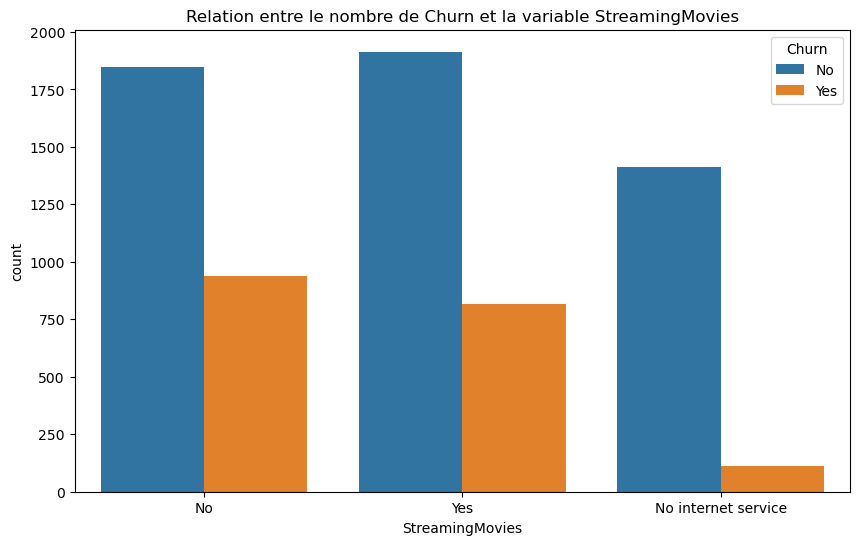

matice de contingence (Frequences observées)
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818


Fréquences attendues :
 [[2045.94490984  739.05509016]
 [1121.04557717  404.95442283]
 [2007.00951299  724.99048701]]


Statistique du chi-carré : 375.6614793452656
P-valeur : 2.667756755723681e-82
Degrés de liberté : 2
Coefficient de Cramér-V : 0.23095080906926801


Coefficient T de Tschuprow : 0.23095080906926801
P-valeur : 2.667756755723681e-82


In [57]:
tests_varqual(df['StreamingMovies'], df['Churn'])

Etude de la liaison entre les variables : `La durée du contrat du client (mois par mois, un an, deux ans)` et `nombre de désabonnement`

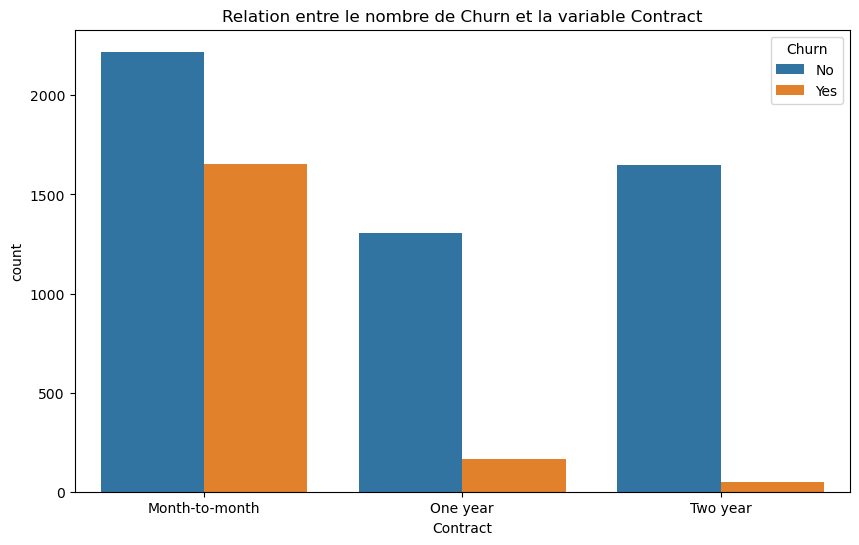

matice de contingence (Frequences observées)
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


Fréquences attendues :
 [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]


Statistique du chi-carré : 1184.5965720837926
P-valeur : 5.863038300673391e-258
Degrés de liberté : 2
Coefficient de Cramér-V : 0.4101156965761409


Coefficient T de Tschuprow : 0.4101156965761409
P-valeur : 5.863038300673391e-258


In [58]:
tests_varqual(df['Contract'], df['Churn'])

De ces résultats, on rejette l'hypothèse $H_{0}$, et à partir de là on peut conclure que le désabonnement d'un client est lié à la durée de son contrat avec l'entreprise. Les clients qui ont des durées de contrat mois par mois ont plus de chance de se désabonner que les autres. 

Etude de la liaison entre les variables : `Le client dispose-t-il ou non d'un système de facturation sans papier (oui, non) ?` et `nombre de désabonnement`

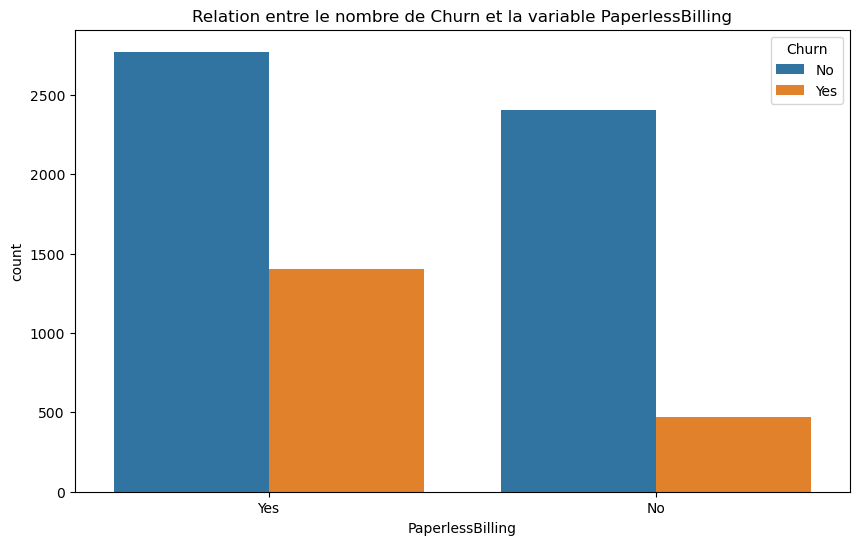

matice de contingence (Frequences observées)
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400


Fréquences attendues :
 [[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]


Statistique du chi-carré : 258.27764906707307
P-valeur : 4.073354668665985e-58
Degrés de liberté : 1
Coefficient de Cramér-V : 0.19149814355338285


Coefficient T de Tschuprow : 0.19149814355338285
P-valeur : 4.073354668665985e-58


In [59]:
tests_varqual(df['PaperlessBilling'], df['Churn'])

Etude de la liaison entre les variables : `Le mode de paiement du client (chèque électronique, chèque postal, virement bancaire (automatique), carte de crédit (automatique))` et `nombre de désabonnement`

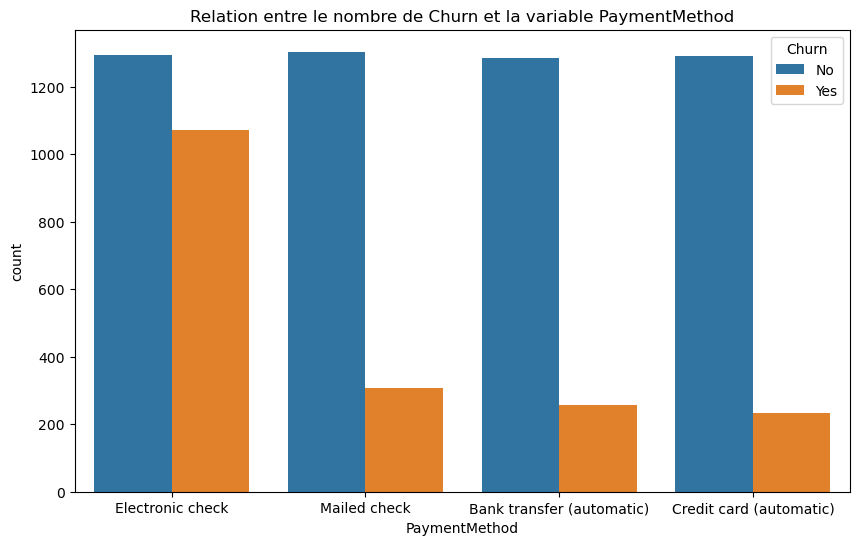

matice de contingence (Frequences observées)
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


Fréquences attendues :
 [[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]


Statistique du chi-carré : 648.1423274814
P-valeur : 3.6823546520097993e-140
Degrés de liberté : 3
Coefficient de Cramér-V : 0.30335862555407056


Coefficient T de Tschuprow : 0.30335862555407056
P-valeur : 3.6823546520097993e-140


In [60]:
tests_varqual(df['PaymentMethod'], df['Churn'])

Etude de la relation entre les variables `StreamingTV` client disposant d'un service de télévision en continue et `StreamingMovies` clients disposant des films streaming

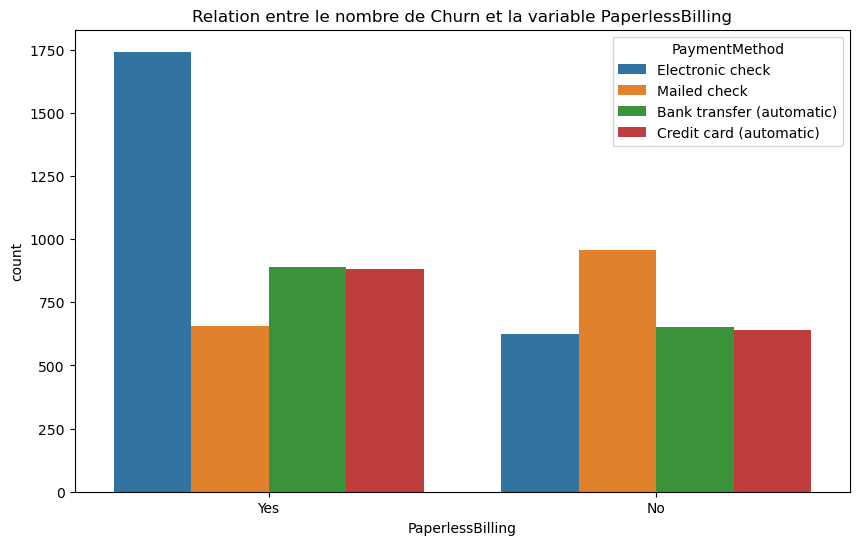

matice de contingence (Frequences observées)
PaymentMethod     Bank transfer (automatic)  Credit card (automatic)  \
PaperlessBilling                                                       
No                                      653                      640   
Yes                                     891                      882   

PaymentMethod     Electronic check  Mailed check  
PaperlessBilling                                  
No                             623           956  
Yes                           1742           656  


Fréquences attendues :
 [[ 629.61351697  620.64233991  964.40153344  657.34260968]
 [ 914.38648303  901.35766009 1400.59846656  954.65739032]]


Statistique du chi-carré : 435.6865186647808
P-valeur : 4.115239070710319e-94
Degrés de liberté : 3
Coefficient de Cramér-V : 0.2487185726719847


Coefficient T de Tschuprow : 0.2487185726719847
P-valeur : 4.115239070710319e-94


In [61]:
tests_varqual(df['PaperlessBilling'], df['PaymentMethod'])

# Analyse de la liaison entre une variable qualitative et une variable quantitative

Dans cette partie, nous allons explorer différents tests pour étudier la liaison entre une variable qualitative et une variable quantitative. Nous utiliserons les tests de Student (t-test), ANOVA, Mann-Whitney, Kruskal-Wallis. Nous utiliserons le jeu de données pour démontrer l'application de ces tests.

Analyse graphique 

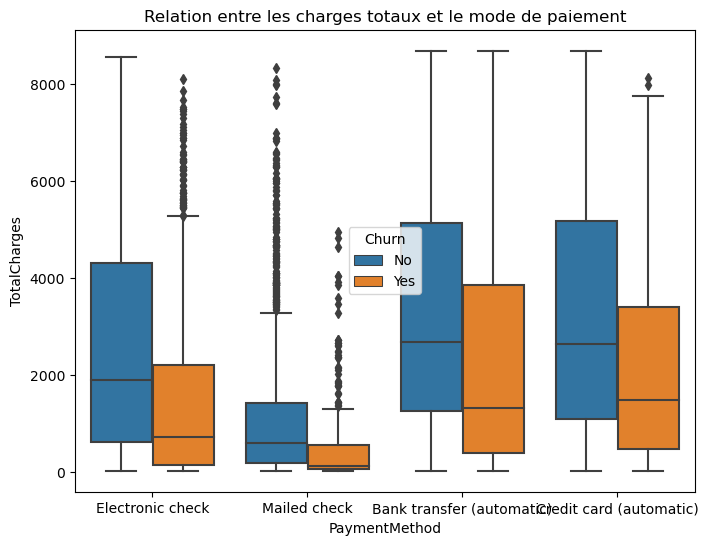

In [62]:
#création de boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='PaymentMethod', y='TotalCharges', hue='Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('TotalCharges')
plt.title('Relation entre les charges totaux et le mode de paiement');



##  Test de Student (t-test)

### Hypothèses
- H0 (hypothèse nulle): Les **moyennes** des deux groupes sont égales.
- H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

### Conditions d'utilisation
- La variable quantitative est **normalement** distribuée dans chaque groupe.
- **Les variances des deux groupes sont égales**.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.



## ANOVA (Analysis of Variance)

### Hypothèses
- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.

### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.


### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les distributions des deux groupes sont significativement différentes.



### Test de Levene pour l'égalité des variances

Le test de Levene est utilisé pour vérifier **l'hypothèse d'égalité des variances** entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

## Hypothèses
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

## Conditions d'utilisation
- Les échantillons sont indépendants.
- Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

## Interprétation
Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.

## Test de Kruskal-Wallis

### Hypothèses
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

**Application sur le jeu de données**

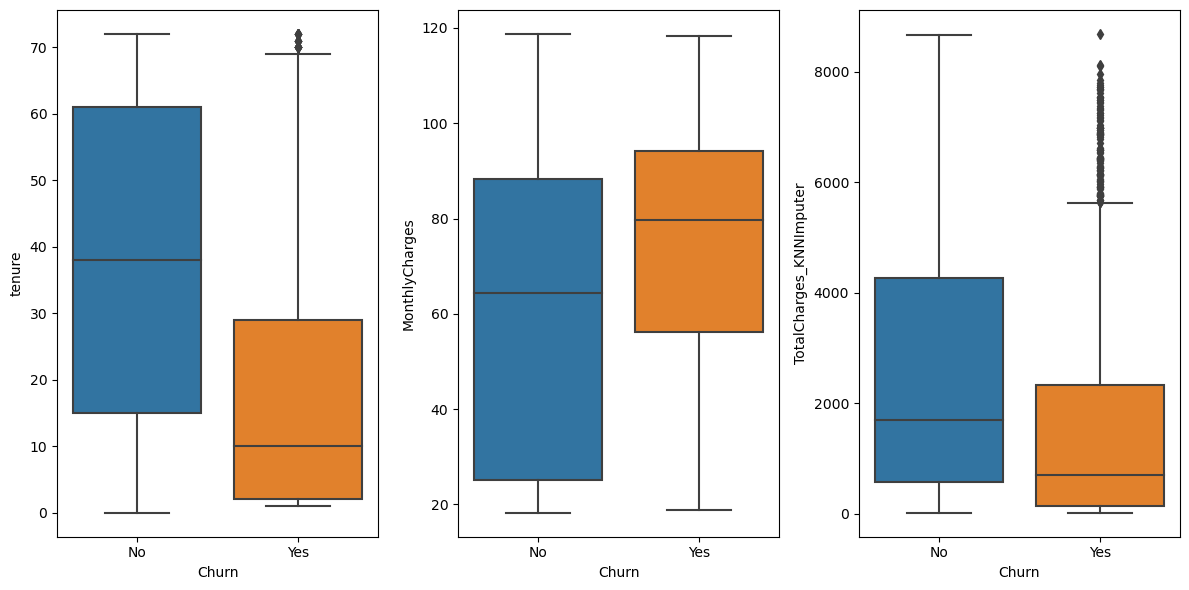

In [63]:
#boxplot pour chaque modalité de catégorie par rapport à la variable Churn
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

for i, col in enumerate(df_numeric[["tenure", "MonthlyCharges", "TotalCharges_KNNImputer"]]):
    sns.boxplot(x = "Churn", y = col, data = df, ax = ax[i])
    
plt.tight_layout();

**Etude de la relation entre les variables `tenue` et `Churn`**

Sur le premier graphique, on remarque une très grande différence entre  la durée d'abonnement des clients qui sont restés fidèles à l'entrepise et la durée d'abonnement des clients qui se sont désabonnés de l'entreprise. De plus, la médiane de la durée du désabonnement Dans le $1^{er}$ groupe (durée d'abonnement des clients qui sont restés fidèles à l'entreprise) est nettement plus grande que le maximun du $2^{ème}$ groupe. A partir de cette différence, On peut dire qu'en moyenne, la durée d'abonnement des clients qui se sont désabonnés est graphiquement plus faible que la durée d'abonnement des clients qui sont restés fidèles à l'entreprise. Il serait donc necessaire d'appuyer ces resultats graphique par des tests statistiques sur ces deux variables. 

In [64]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon, levene

tenure_yes = df[df['Churn'] == 'Yes']['tenure']
tenure_no = df[df['Churn'] == 'No']['tenure']

# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(tenure_yes, tenure_no)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

# Test de Mann-Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tenure_yes, tenure_no)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

# ANOVA
anova_stat, anova_p_value = f_oneway(tenure_yes, tenure_no)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(tenure_yes, tenure_no)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

# Test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(tenure_yes, tenure_no)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique t de Student : -31.57955051135377
P-valeur (t-test) : 7.99905796059022e-205
Statistique U de Mann-Whitney : 2515538.0
P-valeur (Mann-Whitney) : 2.419635517951866e-208
Statistique F de l'ANOVA : 997.2680104991438
P-valeur (ANOVA) : 7.999057960610892e-205
Statistique W de Levene : 417.1696228201477
P-valeur (Levene) : 3.963539602787529e-90
Statistique H de Kruskal-Wallis : 948.7996915155916
P-valeur (Kruskal-Wallis) : 2.4191401818659714e-208


Les resultats des tests nous permettent donc d'avoir des confirmations sur les resultats observés graphiquements sur ces variables. Les statistiques fournis par les tests d'hypothèse de student (t-test),  Mann-Whitney, de l'analyse de la variance (ANOVA), Levene et Kruskal-Wallis nous montrent qu'il existe une différence significative entre les deux groupes de clients selon la durée de l'abonnement (on a des $p-values<0.05$). On peut donc conclure que, **plus la durée d'abonnement est élevée et plus les clients mettent long dans l'entreprise**. Par conséquent, il existe donc une relation linéaire entre la durée d'abonnement et le désabonnement des clients dans l'entreprise.

**Etude de la relation entre les variables `MonthlyCharges` et `Churn`.** 

On peut voir sur le $2^{ème}$ graphique que par rapport à ces deux variables, nous avons deux groupes differents. Le premier groupe represente le montant mensuel facturé au client qui sont restés fidèles à l'entreprise et le deuxème groupe, le montant mensuel facturé au client qui se sont désabonnés de l'entreprise. De ces deux groupes, on constate que les différences au sein de ces groupes se situent principalement au niveau de la médiane et du $1^{er}$ quartile. Dans le $1^{er}$ groupe, la médiane est plus proche du $1^{er}$ quartile du $1^{er}$ groupe que de la médiane de ce groupe. Il sera donc necessaire d'appuyer ces élements par des analyses plus avancées que celles qu'on observe graphiquement. 

In [65]:
# Séparer les données en groupes en fonction des modalités de chaque catégorie
monthly_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
monthly_no = df[df['Churn'] == 'No']['MonthlyCharges']

# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(monthly_yes, monthly_no)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

# Test de Mann-Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(monthly_yes, monthly_no)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

# ANOVA
anova_stat, anova_p_value = f_oneway(monthly_yes, monthly_no)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(monthly_yes, monthly_no)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

# Test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(monthly_yes, monthly_no)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique t de Student : 16.536738015936308
P-valeur (t-test) : 2.7066456068884154e-60
Statistique U de Mann-Whitney : 6003125.5
P-valeur (Mann-Whitney) : 3.311627651988585e-54
Statistique F de l'ANOVA : 273.4637042077133
P-valeur (ANOVA) : 2.7066456068950115e-60
Statistique W de Levene : 361.8444859598828
P-valeur (Levene) : 1.0261244899421871e-78
Statistique H de Kruskal-Wallis : 240.34263218324136
P-valeur (Kruskal-Wallis) : 3.3112855487838454e-54


Les resultats des tests nous permettent d'avoir suffisamment d'élements pour confirmer les resultats observés graphiquements sur les variables. Les statistiques données par les tests d'hypothèse de student (t-test),  Mann-Whitney, de l'analyse de la variance (ANOVA), Levene et Kruskal-Wallis nous montrent qu'il existe une différence significative entre les deux groupes de clients selon les montants facturés par mois à ces clients (on a des $p-values<0.05$). On peut donc conclure que, **les clients qui se sont désabonnés sont ceux qui ont un montant mensuel de charges plus élevé**. Par conséquent, il existe donc une relation linéaire entre le montant facturé aux clients par mois et le désabonnement de ces clients dans l'entreprise.

**Etude de la relation entre `TotalCharges` et `churn`**

Sur le $3^{ème}$ graphique, nous avons aussi deux groupes differents. Le premier groupe represente le montant total facturé aux clients qui sont restés fidèles à l'entreprise et le deuxème groupe, le montant total des charges facturés aux clients qui se sont désabonnés de l'entreprise. De ces deux groupes, on observe des différences en tout point des deux Boxplots. Nous allons vérifier ces resultats à l'aide des analyses plus avancées que celles qu'on observe graphiquement. 

In [66]:
totalChar_yes = df[df['Churn'] == 'Yes']['TotalCharges_KNNImputer']
totalChar_no = df[df['Churn'] == 'No']['TotalCharges_KNNImputer']

# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(totalChar_yes, totalChar_no)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

# Test de Mann-Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(totalChar_yes, totalChar_no)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

# ANOVA
anova_stat, anova_p_value = f_oneway(totalChar_yes, totalChar_no)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(totalChar_yes, totalChar_no)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

# Test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(totalChar_yes, totalChar_no)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique t de Student : -17.077149093914525
P-valeur (t-test) : 4.2338363848794556e-64
Statistique U de Mann-Whitney : 3365890.0
P-valeur (Mann-Whitney) : 1.0852738885618543e-84
Statistique F de l'ANOVA : 291.62902117578534
P-valeur (ANOVA) : 4.2338363848907657e-64
Statistique W de Levene : 165.56123719941186
P-valeur (Levene) : 1.8193108888824705e-37
Statistique H de Kruskal-Wallis : 380.27319248578937
P-valeur (Kruskal-Wallis) : 1.0851330807665161e-84


Avec les tests, nous avons suffisamment d'élements pour confirmer les resultats observés graphiquements sur ces variables. Les statistiques données par les tests d'hypothèse de student (t-test),  Mann-Whitney, de l'analyse de la variance (ANOVA), Levene et Kruskal-Wallis nous montrent qu'il existe une différence significative entre les deux groupes de clients selon les montants totaux facturés (on a des $p-values<0.05$). On peut donc conclure que, **plus le montant total facturé est élevé, et plus le client reste fidèle à l'entreprise**. Par conséquent, il existe donc une relation linéaire entre le montant total facturé aux clients et le désabonnement de ces clients dans l'entreprise. Ce resultat peut par exemple s'expliquer par la corrélation linéaire forte et positive (matrice de corrélation définie plus haut) qui existe entre le nombre de mois pendant lesquels le client est resté dans l'entreprise et le montant total de ces charges. Il est tout à fait normal que pour un client qui met long dans l'entreprise `(tenure)`, son montal total de charges soit élévé `(TotalCharges)` Toutefois, il serait judicieux de procéder à d'autres analyse sur ces deux variables. 

En conclusion, il est important de souligner que l'utilisation de ces tests necessite la connaissance sur la distribution des variables qualitatives. Comme nous l'avons montré plus haut, les variables quanlitatives de cette base de données ne sont pas Gaussienne, et de ce fait, il est recommandé d'utiliser les tests non paramétriques telles que le test de **Kruskall-Wallis**, le **test Levene** et celui de  **Mann-Whitney**

Par rapport à l'analyse bivariée les conclusions qui en ressortent sont les suivantes :

variables donc l'étude montre une association significative avec la variable `Churn` on peut citer : 
- `SeniorCitizen` la maturité du client
- `Partner` l'existence d'un partenaire 
- `Dependents` client ayant des personnes en charges
- `MultipleLines` client disposant de plusieurs lignes
- `InternetService` type de fournisseur d'accès à l'internet au client 
- `OnlineBackup` client disposant d'une ligne sécurisée
- `DeviceProtection` client disposant ou non d'une protection des appareils 
- `TechSupport` cilent disposant d'une assistance technique 
- `StreamingTV` client disposant d'un service télévision en continu
- `StreamingMovies` client disposant de fims en streaming
- `Contract` durée du contrat du client 
- `PaperlessBilling` client disposant d'un système de facturation 
- `PaymentMethod` mode de paiement du client

## Analyse de données multidimensionnelles

### L'Analyse en Composantes Principales (ACP)

L’analyse en composantes principales fait partir des méthodes descriptives en statistique basée principalement sur des représentations graphiques qui reflètent comment les données sont réparties dans un espace. L’objectif de l’ACP est de résumer l’information contenue dans un tableau, constitué souvent d’un nombre élevé de lignes et de colonnes, en quelques représentations graphiques à deux dimensions, plus un certain nombre de caractéristiques numériques.

**Données utilisées dans l'ACP**

L’analyse en composante principale s’applique à des tableaux à deux dimensions croisant des individus et des variables quantitatives appelés de façon concise tableau $Individus\times Variables$ quantitatives. Les lignes du tableau représentent les individus et les colonnes représentent les variables ou $x_{i,j}$ represente le $i^{ème}$ individu ayant la $j^{ème}$ caractéristique.

**Quelques concepts mathématiques**
En ACP, la liaison entre deux variables est mesurée par le coefficient de corrélation linéaire (dans de rares situations, on utilise la covariance). Le coefficient de corrélation linéaire entre les variables $x_{j}$ et $x_{k}$ est donné par :
$$\rho(x_{j}, x_{k}) = \frac{cov(x_{j}, x_{k})}{\sigma_{j}\times \sigma_{k}} = \frac{1}{n}\sum^{n}_{i = 1}(\frac{x_{i,j}-\bar{x}_{j}}{\sigma_{j}})(\frac{x_{i,k}-\bar{x}_{k}}{\sigma_{j}})
$$

**Pourquoi Utiliser L'ACP comme méthode d'analyse de données ?**
- Visualisation des données : cela revient à transformer les données multidimensionnelles en une representation plus simple à l'oeil nu (généralement un plan); facilite la compréhension et l'interprétation des données. 
- Identification des tendances : Mise en évidence des structures et des relations cachées dans les données. 
- La simplification des analyses : Réduction du nombre de variable, diminution du risque d'erreurs et de problèmes liés à la multicolinéarité. 
- Détection des groupes similaires : Identification des profils des individus similaires en fonction des caractéristiques, identification des outliers et des relations entre les variables. 

**L'objectif de l'ACP**

l’ACP cherche à faire :
- Un bilan des ressemblances entre individus; c’est-à-dire repérer les individus qui se ressemblent vis à vis de certaines variables, les individus qui diffèrent, ceux qui sont atypiques, et mettre en évidence des groupes homogènes d’individus.
- Un bilan des liaisons entre variables, c’est-à-dire identifier les variables corrélées positivement entre elles, celles qui s’opposent (sont corrélées négativement), ainsi que les groupes de variables corrélées entre elles.
- Résumer l’information contenue dans les données à l’aide d’un nombre réduit de variables obtenues par combinaison linéaire des variables initiales. Ces variables sont des variables synthétiques appelées **composantes principales**.

**Principe de l'ACP**

- Le principe de l’ACP, et de manière générale des méthodes d’analyse factorielle, est d’obtenir une représentation approchée des nuages des variables et des individus dans un sous-espace de dimension faible ($dim \leq 3$) Cela se fera à l’aide de projection. Cependant, comme la projection déforme les distances, il nous faut des espaces de projection qui minimisent la perte d’inertie, c’est-à-dire qui restituent le maximum d’information. 
- En terme mathématiques, le principe de l’ACP revient à déterminer le sous-espace de projection de sorte que la configuration des points projetés soit aussi proche que possible de la configuration réelle, c’est-à-dire qui minimise la déformation du nuage. 

**Ajustement du nuage des individus**

On défini la distance euclidienne dans l'espace $R^{p}$ des individus entre l'individus $i$ et l'individus $j$ par :
$$d^{2}(e_{i}, e_{j}) = ||e_{i}-e_{j}||^{2} = \sum^{p}_{k}(x_{i,k}-x_{j,k})^{2}$$

On va chercher un sous-espace vectoriel à une dimension, c’est à dire une droite $(d)$ passant par l’origine, qui ajuste au mieux le nuage. Cela revient donc à maximiser l'inertie défini par :
$$I_{0} = \frac{1}{n}\sum^{n}_{i=1}d^{2}(0, e'_{i}) = \frac{1}{n}\sum_{i}||e'_{i}||^{2} = u'_{1}x'xu_{1}$$
où $u_{1}$ est le vecteur unitaire de $(d_{1})$, $e'_{i}$ est le projeté orthogonal de $e_{i}$ sur le sous espace vectoriel de dimension 1 engendré par $u_{1}$,   

$e'_{i}$ sera défini par : $e'_{i} = \left\langle {e_{i}, u_{1}}\right\rangle$

Maximiser cette inertie, revient donc à résoudre le programme de maximisation ci-après :
$max (u'_{1}x'xu_{1})$ sous contrainte de $||u_{1}||^{2} = 1$

$u_{1}$ est donc un vecteur propre associé à la valeur propre $\lambda_{1}$. On montre que c’est le vecteur propre associé à la plus grande valeur propre de la matrice $xx'$ des individus. La projection des individus sur l’axe $u_{1}$ u est appelée $1^{ère}$ composante principale.

**Ajustement du nuage des variables**

De la même façon que pour le nuage des individus, nous cherchons une image du nuage des variables qui se situe dans l’espace $R^{n}$. L’approche est identique à celle du nuage des individus, il suffit de considérer la matrice $X'$ au lieu de $X$.

Les élements d'aide à l'interprétation des axes factoriels seront données un peu plus loin dans le cas de l'ACM. 

### L'Analyse Factorielle des Correspondances Multiples (ACM)

L'analyse factorielle des correspondances Multiples (ACM) est une méthode statistique qui permet de réduire les dimensions d'un tableau de données croisées. Elle permet également de visualiser la structure des relations entre les variables et les individus en utilisant des graphiques.

**Étape 1 : Construction du tableau de données**

L'ACM nécessite un tableau de données croisées appelé "tableau de contingence". Ce tableau doit être construit à partir des données brutes, en croisant les valeurs de chaque variable.

|     | Variable 1 | Variable 2 | ... | Variable p |
| --- | --- | --- | --- | --- |
| Individu 1 | $n_{11}$ | $n_{12}$ | ... | $n_{1p}$ |
| Individu 2 | $n_{21}$ | $n_{22}$ | ... | $n_{2p}$ |
| ... | ... | ... | ... | ... |
| Individu n | $n_{n1}$ | $n_{n2}$ | ... | $n_{np}$ |

Chaque $n_{ij}$ représente le nombre d'individus ayant à la fois la valeur $i$ pour la variable 1 et la valeur $j$ pour la variable 2.

**Étape 2 : Calcul de la distance de khi-deux**

La distance de khi-deux est une mesure de la différence entre les observations et les fréquences attendues sous l'hypothèse d'indépendance entre les variables. Elle est utilisée pour mesurer la similitude entre deux variables. La formule de la distance de khi-deux est la suivante :

$$ d_{ij}^2 = \sum_{k=1}^{p}\frac{(n_{ik}n_{jk})^2}{n_{i\cdot}n_{\cdot k}n_{j\cdot}n_{\cdot k}} $$

où $n_{i\cdot}$ est la somme des effectifs de la ligne $i$, $n_{\cdot k}$ est la somme des effectifs de la colonne $k$ et $n_{\cdot\cdot}$ est la somme totale des effectifs du tableau.

**Étape 3 : Calcul de la matrice des distances**

La matrice des distances est une matrice carrée qui mesure les distances entre chaque paire de variables. Elle est calculée en utilisant la distance de khi-deux entre chaque paire de variables.

**Étape 4 : Calcul des cosinus carrés et des contributions**

Les cosinus carrés mesurent l'association entre chaque variable et chaque axe factoriel. Ils sont calculés en utilisant la formule suivante :

$$ cos^2_{ij} = \frac{f_{ij}^2}{r_i c_j} $$

où $f_{ij}$ est la fréquence observée de la variable $i$ pour la catégorie $j$, $r_i$ est la somme des fréquences de la variable $i$ et $c_j$ est la somme des fréquences de la catégorie $j$.

Les contributions mesurent l'importance de chaque variable pour l'axe factoriel correspondant. Elles sont calculées en utilisant la formule suivante :

$$ contribution_{ij} = \frac{cos^2_{ij}}{\lambda_j} $$

où $\lambda_j$ est la valeur propre de l'axe factoriel $j$. Les contributions sont exprimées en pourcentage et indiquent la part de la variance expliquée par chaque variable sur l'axe factoriel correspondant.

Les cosinus carrés et les contributions sont des indicateurs importants pour interpréter les résultats de l'AFC et sélectionner les variables les plus pertinentes pour chaque axe factoriel.

**Étape 5 : Calcul des valeurs propres**

Les valeurs propres sont des mesures de l'importance de chaque axe factoriel pour expliquer la variation totale des données.

Les valeurs propres sont calculées à partir des cosinus carrés des variables sur chaque axe factoriel. La formule de calcul est la suivante :

$$ \lambda_j = \sum_{i=1}^{n}cos^2_{ij} $$

où $\lambda_j$ est la valeur propre de l'axe factoriel $j$ et $cos^2_{ij}$ est le carré du cosinus de l'angle formé entre la variable $i$ et l'axe factoriel $j$. Les valeurs propres sont ordonnées de manière décroissante, et l'axe factoriel qui a la plus grande valeur propre est appelé le premier axe factoriel.

**Étape 6 : Construction du graphique**

Le graphique de l'AFC est un nuage de points qui représente les individus et les variables dans un espace de dimension réduite. Les axes du graphique sont les axes factoriels, et les points sont placés en fonction de leurs coordonnées sur ces axes. Les points qui sont proches les uns des autres ont des profils similaires.

Pour construire le graphique de l'AFC, on utilise les coordonnées factorielles des individus et des variables qui ont été calculées à l'étape 4. Les individus sont représentés par des cercles, et les variables sont représentées par des flèches qui indiquent leur contribution à chaque axe factoriel.

On peut également colorer les cercles ou les flèches en fonction d'une variable supplémentaire pour visualiser la relation entre cette variable et les axes factoriels.

**Résumé**

L'Analyse Factorielle des Correspondances Multiples (ACM) est une méthode statistique qui permet de réduire les dimensions d'un tableau de données croisées. Elle permet également de visualiser la structure des relations entre les variables et les individus en utilisant des graphiques.


#### Mise en pratique de L'ACM sur la base de données

In [67]:
#!pip install fanalysis

In [68]:
import fanalysis.mca as mca

# Liste des variables qualitatives
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',  'MultipleLines','InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

X = df[categorical_columns].values

In [69]:
X

array([['Female', 'No', 'Yes', ..., 'Yes', 'Electronic check', 'No'],
       ['Male', 'No', 'No', ..., 'No', 'Mailed check', 'No'],
       ['Male', 'No', 'No', ..., 'Yes', 'Mailed check', 'Yes'],
       ...,
       ['Female', 'No', 'Yes', ..., 'Yes', 'Electronic check', 'No'],
       ['Male', 'Yes', 'Yes', ..., 'Yes', 'Mailed check', 'Yes'],
       ['Male', 'No', 'No', ..., 'Yes', 'Bank transfer (automatic)',
        'No']], dtype=object)

In [70]:
df=df
# Créer une instance de la classe MCA
my_mca = mca.MCA(row_labels=df.index.values, var_labels=categorical_columns)

In [71]:
# Estimation de l'ACM
my_mca.fit(X)

MCA(row_labels=array([   0,    1,    2, ..., 7040, 7041, 7042], dtype=int64),
    var_labels=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                'PaperlessBilling', 'PaymentMethod', 'Churn'])

## Aides à l'interprétation

### Choix du nombre d'axe factoriel par l'analyse des valeurs propres


In [72]:
#vecteurs propres
print(my_mca.eig_)

[[4.50444130e-01 1.79920230e-01 1.45719198e-01 9.14202310e-02
  7.26671158e-02 6.15131339e-02 5.93043494e-02 5.90793709e-02
  5.80084665e-02 5.01681715e-02 4.95076861e-02 4.58975441e-02
  4.40098538e-02 4.24367265e-02 4.12529135e-02 3.99392839e-02
  3.89236219e-02 3.31343986e-02 2.96463702e-02 2.82023041e-02
  2.58637239e-02 3.57759957e-30 1.62944676e-30 4.55835005e-31
  3.18119089e-31 1.65679025e-31 1.25450925e-31 8.35405831e-32]
 [2.73483936e+01 1.09237283e+01 8.84723700e+00 5.55051402e+00
  4.41193203e+00 3.73472599e+00 3.60062121e+00 3.58696181e+00
  3.52194261e+00 3.04592470e+00 3.00582380e+00 2.78663660e+00
  2.67202684e+00 2.57651554e+00 2.50464117e+00 2.42488509e+00
  2.36321990e+00 2.01173135e+00 1.79995819e+00 1.71228275e+00
  1.57029752e+00 2.17211402e-28 9.89306962e-29 2.76756967e-29
  1.93143733e-29 1.00590836e-29 7.61666328e-30 5.07210683e-30]
 [2.73483936e+01 3.82721219e+01 4.71193589e+01 5.26698729e+01
  5.70818049e+01 6.08165309e+01 6.44171521e+01 6.80041139e+01
  7.15

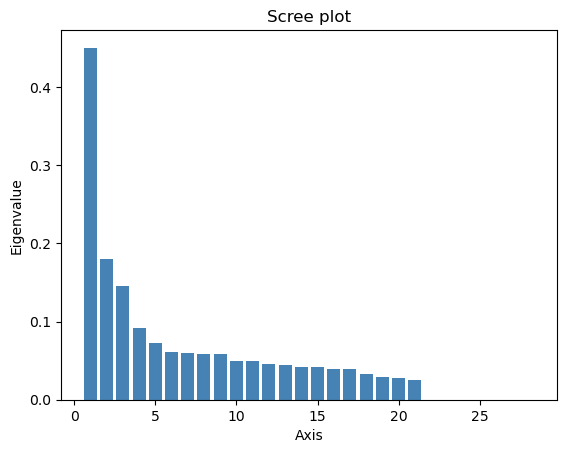

In [73]:
# Graphique des valeurs propres 
my_mca.plot_eigenvalues()

la somme des valeurs propres correspond à l’inertie total qui représente à la variabilité totale de l’information contenue dans les données. Il s'agit de la quantité d'information contenue dans les données. 

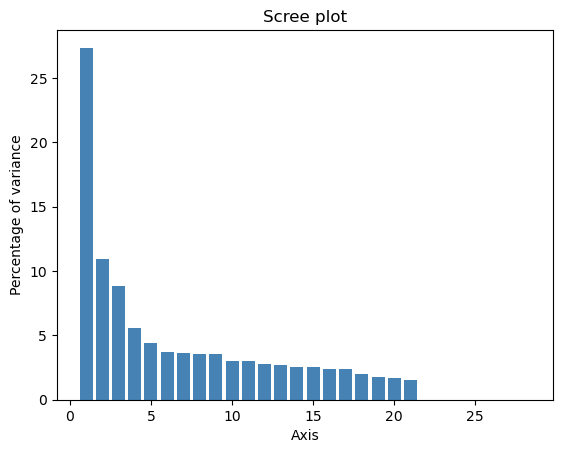

In [74]:
# Pourcentage de variance expliqué
my_mca.plot_eigenvalues(type="percentage")

On peut observer ici que le premier axe factoriel (valeur propre) à une inertie supérieur au suivant. Le pourcentage d’inertie associé à ce $1^{er}$ axe factoriel est de $28,17\%$. Celui du $2^{ème}$ axe est de $11,25\%$. Ce qui veut dire que entre le $1^{er}$ axe et le $2^{ème}$, apporte $39,42\%$ de l'information contenu dans les données. Le troisième axe quant à lui porte $9,06\%$ de l'information contenues dans les données. On peut aussi remarquer que les autres axes factoriels véhiculent à peu près la même information c’est-à-dire qu’ils ont à peu près les mêmes pourcentages d’inertie à partir du $5^{ème}$ axe factoriel. Lors de l’interprétation, il serait donc difficile de se limiter aux 2 premiers axe factoriels. Il est  utile de combiner aussi le 1er axe factoriel avec les 3 premiers axes factoriels car les autres axes factoriels n'apportent pas suffisament d'information que le 3ème axes factoriel.

### Analyse de la qualité de représentation en colonne

**Informations sur les individus**

In [75]:
info_row = my_mca.row_topandas()
info_row.columns

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8',
       'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11',
       'row_coord_dim12', 'row_coord_dim13', 'row_coord_dim14',
       'row_coord_dim15', 'row_coord_dim16', 'row_coord_dim17',
       'row_coord_dim18', 'row_coord_dim19', 'row_coord_dim20',
       'row_coord_dim21', 'row_coord_dim22', 'row_coord_dim23',
       'row_coord_dim24', 'row_coord_dim25', 'row_coord_dim26',
       'row_coord_dim27', 'row_coord_dim28', 'row_contrib_dim1',
       'row_contrib_dim2', 'row_contrib_dim3', 'row_contrib_dim4',
       'row_contrib_dim5', 'row_contrib_dim6', 'row_contrib_dim7',
       'row_contrib_dim8', 'row_contrib_dim9', 'row_contrib_dim10',
       'row_contrib_dim11', 'row_contrib_dim12', 'row_contrib_dim13',
       'row_contrib_dim14', 'row_contrib_dim15', 'row_contrib_dim16',
       'row_contrib_dim17', 'row_contrib_dim18', 'ro

In [76]:
coord_row = info_row[['row_coord_dim1', 'row_coord_dim2']]
print(coord_row)

      row_coord_dim1  row_coord_dim2
0           0.509873       -0.035856
1           0.149619        0.025614
2           0.311709       -0.348430
3           0.343085        0.560684
4           0.441004       -0.811583
...              ...             ...
7038        0.222036        0.713632
7039        0.304801        0.487737
7040        0.466845        0.113837
7041        0.443990       -0.632345
7042        0.241536        0.464762

[7043 rows x 2 columns]


**Informations sur les variables**

In [77]:
info_col = my_mca.col_topandas()
info_col.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_coord_dim11',
       'col_coord_dim12', 'col_coord_dim13', 'col_coord_dim14',
       'col_coord_dim15', 'col_coord_dim16', 'col_coord_dim17',
       'col_coord_dim18', 'col_coord_dim19', 'col_coord_dim20',
       'col_coord_dim21', 'col_coord_dim22', 'col_coord_dim23',
       'col_coord_dim24', 'col_coord_dim25', 'col_coord_dim26',
       'col_coord_dim27', 'col_coord_dim28', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_contrib_dim7',
       'col_contrib_dim8', 'col_contrib_dim9', 'col_contrib_dim10',
       'col_contrib_dim11', 'col_contrib_dim12', 'col_contrib_dim13',
       'col_contrib_dim14', 'col_contrib_dim15', 'col_contrib_dim16',
       'col_contrib_dim17', 'col_contrib_dim18', 'co

In [78]:
coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
print(coord_col)

                                         col_coord_dim1  col_coord_dim2
gender_Female                                  0.008069        0.008148
gender_Male                                   -0.007917       -0.007995
SeniorCitizen_No                              -0.105933        0.075688
SeniorCitizen_Yes                              0.547385       -0.391101
Partner_No                                     0.030819       -0.449126
Partner_Yes                                   -0.032985        0.480679
Dependents_No                                  0.126216       -0.244815
Dependents_Yes                                -0.295082        0.572357
PhoneService_No                                0.624889        0.699467
PhoneService_Yes                              -0.066998       -0.074994
MultipleLines_No                              -0.366699       -0.307885
MultipleLines_No phone service                 0.624889        0.699467
MultipleLines_Yes                              0.274970        0

In [79]:
coord_col.index

Index(['gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Pape

### Qualité de représentation

#### Qualité profil colonnes (modalités des variables)

Premier Axe


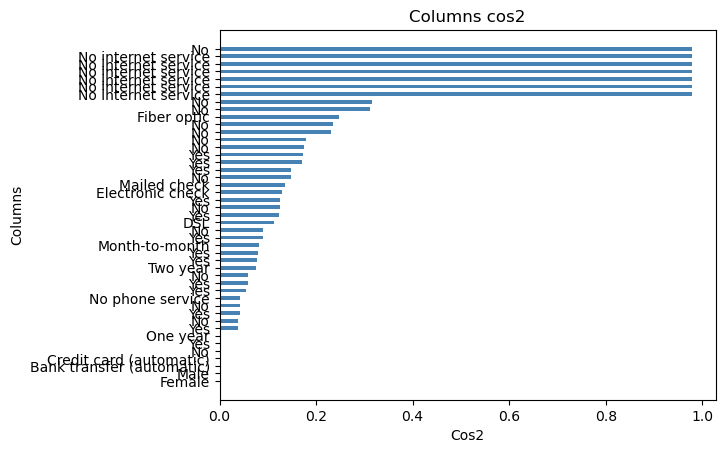

Deuxième  Axe


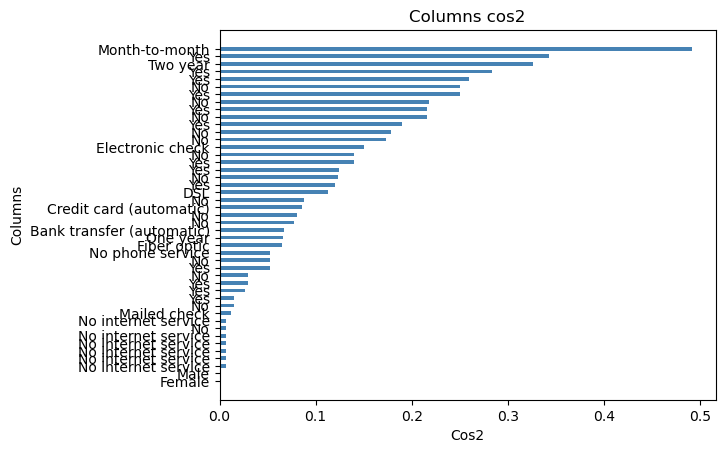

Troisième  Axe


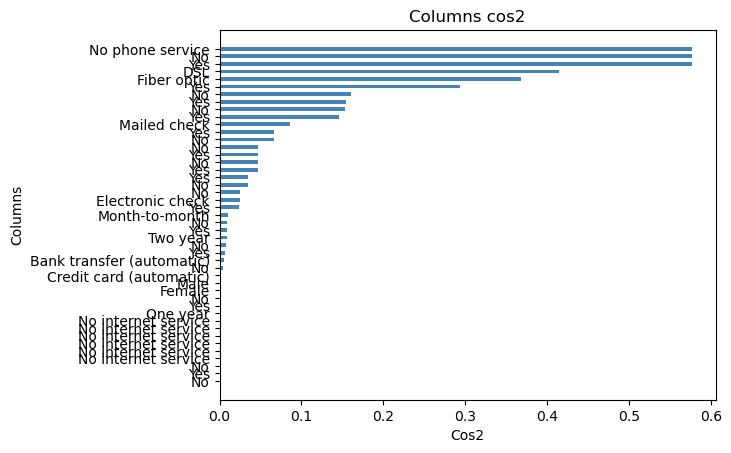

In [80]:
print("Premier Axe")

my_mca.plot_col_cos2(num_axis=1)
print("Deuxième  Axe")

my_mca.plot_col_cos2(num_axis=2)
print("Troisième  Axe")

my_mca.plot_col_cos2(num_axis=3)

Les variables qui sont suffisamment bien représentées par rapport au $1^{er}$ axe factoriel sont les suivantes : 
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`

Pour le $2^{ème}$ axe :
- `Contract`
- `Churn`

#### Analyse des contributions

#### Contribution profil colonne

Premier Axe


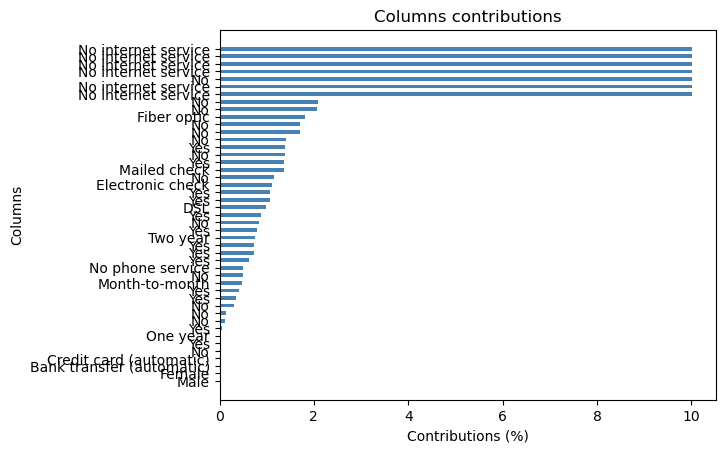

In [81]:
print("Premier Axe")
my_mca.plot_col_contrib(num_axis=1)

Deuxième  Axe


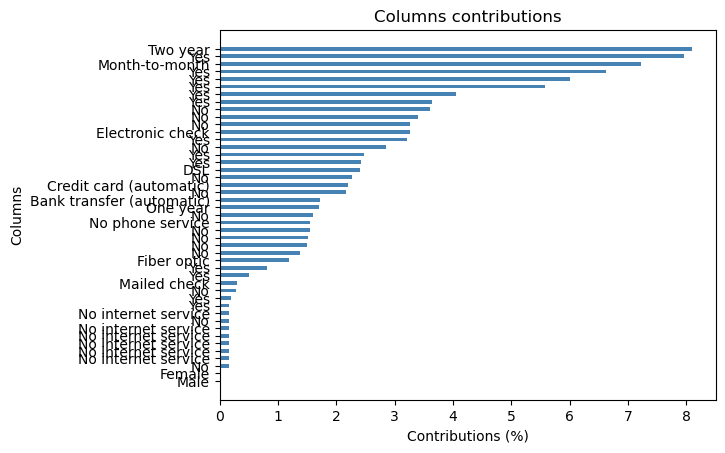

In [82]:
print("Deuxième  Axe")
my_mca.plot_col_contrib(num_axis=2)

Le variables qui contribut les plus à la formation du $1^{er}$ axe factoriel sont les suivantes : 
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`
- Tous les autres variables ne sont pas bien représentées par rapport à cette axe

Le variables qui contribut les plus à la formation du $2^{ème}$ axe factoriel sont les suivantes : 
- `Contract`
- `PaymentMethod`
- `Churn`
- `InternetService`

Les variables qui contribut le moins à la formation de cette axe sont les suivantes : 
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`


## Interprétation graphiques

<Figure size 1500x1000 with 0 Axes>

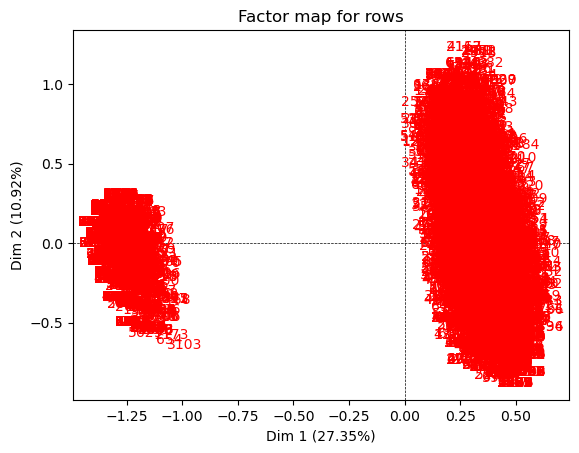

In [83]:
# Graphique profil ligne
plt.figure(figsize=(15, 10))
my_mca.mapping_row(num_x_axis=1, num_y_axis=2);

La représentatition du graphique suivant le profil ligne fait ressortir clairement deux groupes (clusters) différents suivant le $1^{er}$ axe.

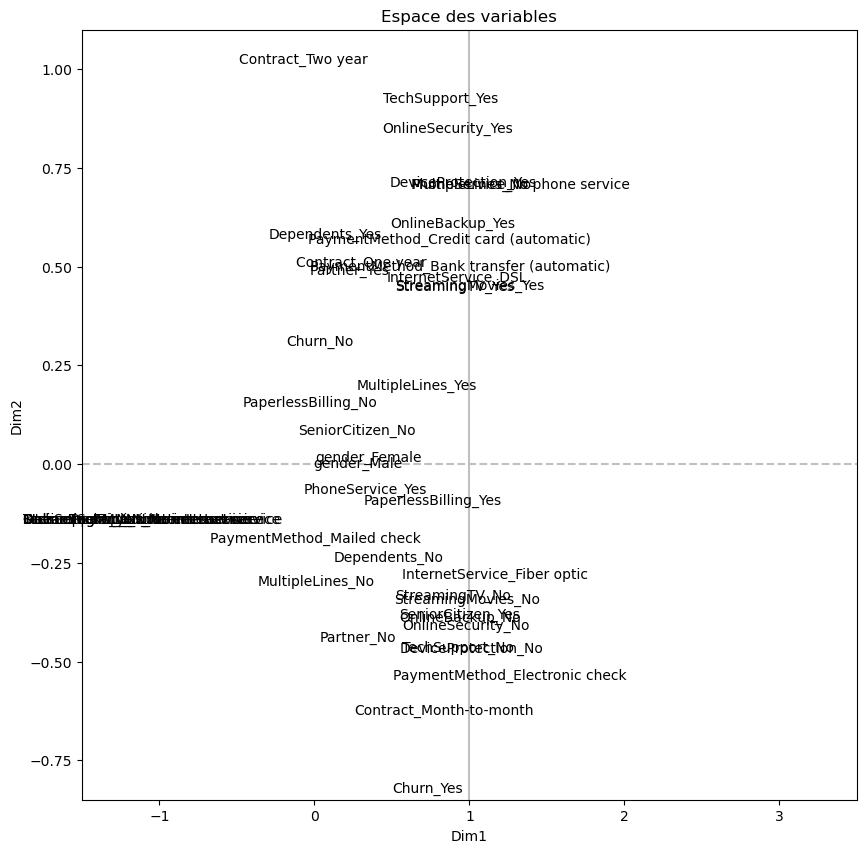

In [84]:
#Pour mieux rendre compte de la dispersion des modalités
fig, ax = plt.subplots(figsize = (10, 10))
ax.axis([-1.5, +3.5, -0.85, +1.1])
ax.plot([-1.5, +3.5], [0, 0], color = 'silver', linestyle = '--')
ax.plot([1, 1], [-0.85, +1.1], color = 'silver', linestyle = '-')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
plt.title('Espace des variables')
for i in range(coord_col.shape[0]):
    ax.text(coord_col.iloc[i, 0], coord_col.iloc[i, 1], coord_col.index[i])

plt.show()

Une façon d'avoir un visuel des modalités suivant les axes factoriels consiste à modifier le nombre d'itération dans la boucle `for`. Par exemple pour `range(coord_col.shape[0]-30)`, cela diminue le nombre de modalités dans le graphique. On peut peut procéder par itération en modifiant à chaque fois le nombre d'itération de manière à ajouter modalité par modalité dans l'espace des variables. 

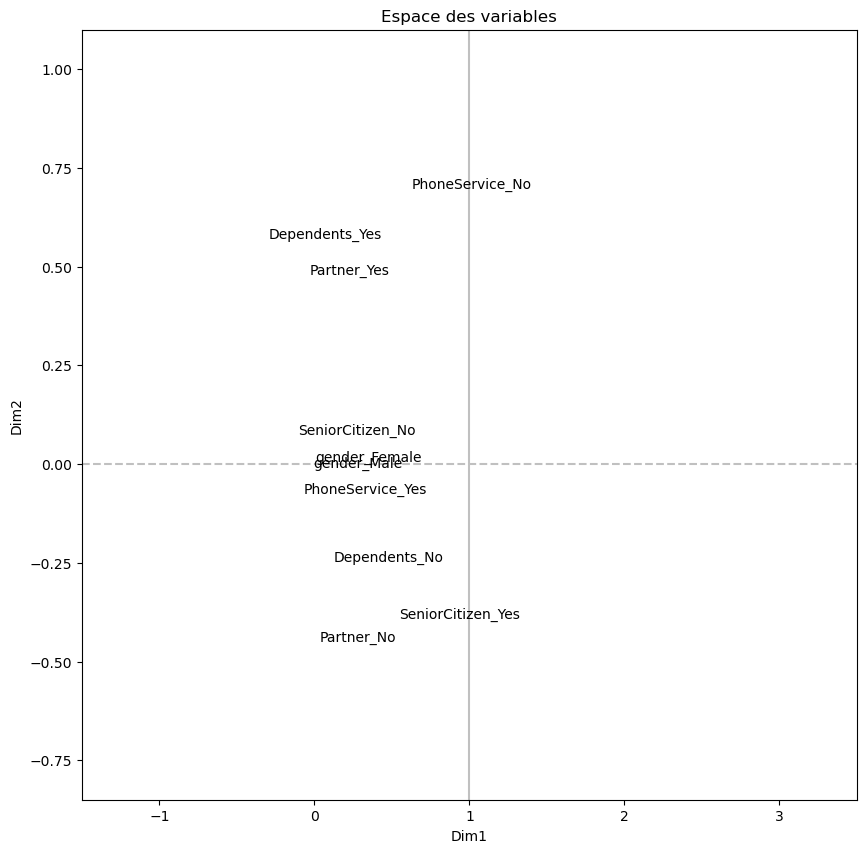

In [85]:
#Pour mieux rendre compte de la dispersion des modalités
fig, ax = plt.subplots(figsize = (10, 10))
ax.axis([-1.5, +3.5, -0.85, +1.1])
ax.plot([-1.5, +3.5], [0, 0], color = 'silver', linestyle = '--')
ax.plot([1, 1], [-0.85, +1.1], color = 'silver', linestyle = '-')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
plt.title('Espace des variables')
for i in range(coord_col.shape[0]-35):
    ax.text(coord_col.iloc[i, 0], coord_col.iloc[i, 1], coord_col.index[i])

plt.show()

In [86]:
# Graphique superposition si nécessaire
#my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False);

Il serait difficile d'interpreté les resultats de l'ACM tout simplement parce que certaines modalités de variable se supperposent. Se qui rend l'interprétation graphique difficile et à paertir de là, on ne peut pas se reférer dessus pour pouvoir identifier les groupes de modalités qui sont corrélées entre elles et qui ont peuvent expliquer le désabonnement des clients dans l'entreprise. 

Une facçon de resoudre ce problème serait de fait une analyse par clustering et plus particulièrement utiliser la méthode agglomerative clustering, car celle-ci permet est mieux adapter pour la segmentation des variables. Et à partir de là on saura exactement qu'elles sont les modalités de variables qui sont à l'origine du `Churn` des clients dans l'entreprise d'une part et si les résultats des analyses descriptives bivariés sur des corrélations et des liaisons entre ces variables sont confirmées. 

## Analyse basée sur le clustering

Dans le clustering sur variables qualitative, l'objectif est de chercher des patterns dans les structures de données. il s'agit de trouver des groupes de variables similaires entre elles, et dissimilaires entre chaque groupe. Pour notre base de données, l'objectif est de voir quelles sont les variables qui sont associées au nombre de désabonnement ou non (`Churn`). 

De manière plus precise, la classification des variables qualitatives consister à classifier les modalités (catégories ou classes) des ces variables. De ce fait, il est tout à fait possible de combiner l'ACM avec la méthode de classification des $K-Means$ et d'autres méthodes de clustering. 

**Mise en place de l'algorithme des $k-Means$ à partir des resultats obtenus dans l'ACM**

**$1^{er}$ étape**

Nous allons commencer par récupérer les poids des modalités qui représentent un ensemble d'observation (les modalités c'est à dire les catégories des variables dans le plan factoriel) à partir de l'ACM. Ces poids des modalités sont pondérés par l'ensemble des observation représentant ces poids (le nombres d'individus qui constitut grahiquement les modalités). 

In [87]:
#poinds des modalités
my_mca.c_

array([[3488., 3555., 5901., 1142., 3641., 3402., 4933., 2110.,  682.,
        6361., 3390.,  682., 2971., 2421., 3096., 1526., 3498., 1526.,
        2019., 3088., 1526., 2429., 3095., 1526., 2422., 3473., 1526.,
        2044., 2810., 1526., 2707., 2785., 1526., 2732., 3875., 1473.,
        1695., 2872., 4171., 1544., 1522., 2365., 1612., 5174., 1869.]])

In [88]:
#vérification des premières variables de la variable Churn
np.unique(df['Churn'].values, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([5174, 1869], dtype=int64))

**$2^{ème}$ étape**

On calcul ensuite le poids relative des modalités. Cette procédure est necessaire pour se rassurer que la somme totale des profils colonne donne $1$ car il s'agit bien d'une fréquence relative. A la fin, on obtient un matrice normalisée. 

In [89]:
col_mass = my_mca.c_ / (df.shape[0]*df.shape[1])
col_mass

array([[0.02153233, 0.02194593, 0.0364284 , 0.00704986, 0.02247683,
        0.02100143, 0.03045269, 0.01302558, 0.00421016, 0.0392681 ,
        0.02092735, 0.00421016, 0.01834075, 0.01494546, 0.01911241,
        0.00942039, 0.02159406, 0.00942039, 0.01246381, 0.01906302,
        0.00942039, 0.01499485, 0.01910624, 0.00942039, 0.01495163,
        0.02143973, 0.00942039, 0.01261814, 0.01734686, 0.00942039,
        0.01671101, 0.01719253, 0.00942039, 0.01686534, 0.02392138,
        0.00909321, 0.01046367, 0.0177296 , 0.02574866, 0.00953151,
        0.0093957 , 0.01459976, 0.00995129, 0.03194044, 0.01153782]])

**$3^{ème} étape$**

Implémentation du clutering des $k$-Means

In [90]:
#importation du module pour le clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)

#entrainement des données pondérées avec l'option sample_weight
km.fit(X=coord_col, sample_weight=col_mass[0])

#information sur les centres de groupes 
centroids = km.cluster_centers_
print(centroids)

[[ 0.18424001  0.01475212]
 [-1.88084523 -0.15059952]]


In [91]:
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0]


**$4^{ème}$ étape**

On va regrouper les coordonées factoriels des individus avec leurs groupes d'appartenance.

In [92]:
coord_grp = coord_col.copy()
coord_grp["groupes"] = km.labels_
#affichage des coordonnées
coord_grp.head()

,col_coord_dim1,col_coord_dim2,groupes
gender_Female,0.008069,0.008148,0
gender_Male,-0.007917,-0.007995,0
SeniorCitizen_No,-0.105933,0.075688,0
SeniorCitizen_Yes,0.547385,-0.391101,0
Partner_No,0.030819,-0.449126,0


**$5^{ème}$ étape**

Nous allons afficher les poids modalités associés à chaque groupe. Pour chaque groupe, nous allons afficher les modalités correspondantes et ensuite, on affiche les indexes correspondants aux indices qui sont associées. 

In [93]:
#gestion des groupes 
gb = coord_grp.groupby('groupes')
#affichage par indice
for i in gb.indices.keys():
    print("\n Groupe : ",i)
    print(coord_grp.index[gb.indices[i]])


 Groupe :  0
Index(['gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_No', 'Churn_Yes'],
      dtype='object')

 Groupe :  1
In

A partir de ce resultat, on peut voir les modalités qui constitut chaque cluster. Le premier cluster est celui dans lequel se trouve l'ensembles des modalités qui peuvent expliquer le nombre de désabonnement des clients (`Chrun`). 

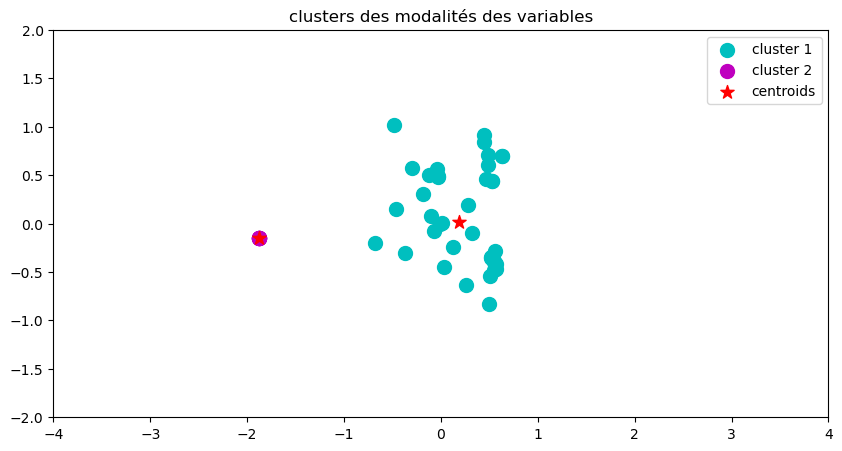

In [94]:
fig, ax = plt.subplots(figsize = (10, 6))
color = ["c", "m"]
lab = ["cluster 1", "cluster 2"]
for i in range(2):
    plt.scatter(coord_col.iloc[km.labels_ == i, 0], coord_col.iloc[km.labels_ == i, 1], s = 100, c = color[i], label = lab[i])
    
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, marker="*", c = "red", label = "centroids")

plt.legend()
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.title("clusters des modalités des variables")
ax.set_aspect("equal");

**Mise en oeuvre de l'algorithme d'agglomération avec les resultats de l'ACM**

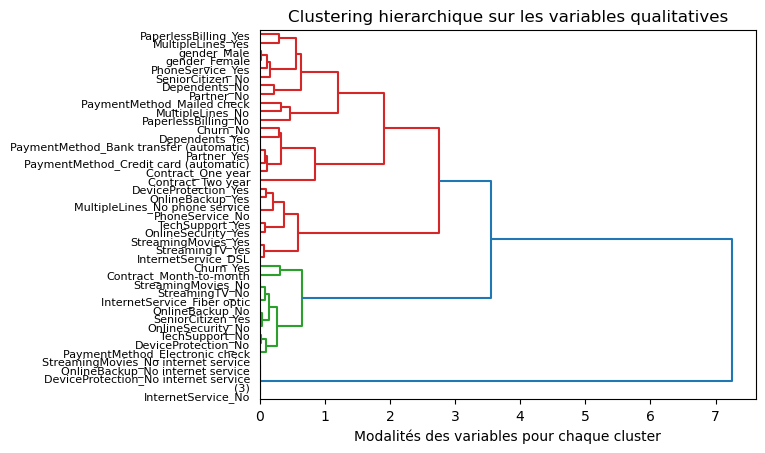

In [95]:
from scipy.cluster.hierarchy import dendrogram, ward

# Utilisation de la distance de Ward sur la matrice des coordonnées factorielles
linkage_array = ward(coord_col)

# Maintenant, nous traçons le dendrogramme pour le tableau de liens contenant les distances entre les groupes.
dendrogram(linkage_array, labels=coord_col.index, orientation ='right', truncate_mode='lastp', p=43, color_threshold=3)

ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Clustering hierarchique sur les variables qualitatives')
plt.xlabel('Modalités des variables pour chaque cluster');

A partir des resultats fournit par l'algorihme de clustering d'agglomerative, on peut déjà classifier les modalités des variables en fonction de leur similarité et par conséquent trouver les variables qui peuvent expliquer la fidélité et le désabonnement des clients dans l'entreprise. On peut former 3 clusters différnts en focntion des modalités de la variable `Churn`.

Parmis les modalités liées aux désabonnements on peut citer : 

- ayant une durée de contrat mois par mois, `Contract_Month-to-month`
- les clients qui ne disposent pas de sauvegarde en ligne, `OnlineBackup_No`
- les clients qui ne disposent pas de sécurité en ligne, `OnlineSecurity_No`
- Les clients qui sont ne sont pas âgés, `SeniorCitizen_No`
- les clients qui ne disposent pas de la télévision en streaming (`StreamingTV_No`) et des films en streaming (`StreamingMovies_No`)
- les clients qui ont un fournisseur de service internet par fibre optique, `InternetService_Fiber optic`
- les clients qui ne disposent pas de support technique, `TechSupport_No`
- les clients qui ne diposent pas d'une protection de l'appareil, `DeviceProtection_No`
- les clients qui ont des modes de paiement par cheque posté, `PaymentMethod_Mailed check`, et par cheque electronique, `PaymentMethod_Electronic check`

Pour les modalités liées à la fidélité à l'entreprise :
-les clients avec les facturations dématérialisées,  `PaperlessBilling_Yes`
-les clients qui diposent de plusieurs lignes,  `MultipleLines_Yes`
- Les clients des deux sexes , `gender_Male` et `gender_Male`
- les clients avec un service téléphonique, `PhoneService_Yes`
- Les clients qui sont âgés `SeniorCitizen_Yes`
- Les clients qui non pas de partenaire social et non pas de partenaire social, `Partner_No` et `Partner_Yes`
- les clients qui des personnes en charge, `Dependents_Yes`
- les clients qui n'ont pas de personnes en charge, `Dependents_No`
- les clients qui ne diposent pas de plusieurs lignes, `MultipleLines_No`
- les clients qui ont des modes de paiement par carte de credit (`PaymentMethod_credit card (automatic)`) et par transfert bancaire (`PaymentMethod_bank transfert(automatic)`), 
- Les clients qui ont un partenaire social, `Partner_Yes`
- Les clients qui n'ont pas les facturations dématérialisées`PaperlessBilling_No`
- Les clients dont ayant une durée de contrat par an, `Contract_One year`
- des clients ayant une durée de contrat tout les $2$ ans, `Contract_Two year`
- les clients qui diposent d'une protection de l'appareil, `DeviceProtection_Yes`
- les clients qui disposent de sauvegarde en ligne, `OnlineBackup_Yes`
- les clients qui diposent ne disposent pas de plusieurs en lignes, `MultipleLines_No`
- les clients qui n'ont pas un service téléphonique, `PhoneService_No`
- les clients qui disposent de la télévision en streaming (`StreamingTV_Yes`) et des films en streaming (`StreamingMovies_Yes`)
- les clients qui ont un fournisseur de service internet DSL, `InternetService_DSL`
- les clients qui disposent d'un support technique, `TechSupport_Yes`
- les clients qui disposent d'une sécurité en ligne, `OnlineSecurity_Yes`

On peut voir très bien que ces modalités sont exactement celles qui ont été décrites comme étant celles qui influence le plus la variable de la variable `Churn` dans l'analyse bivariée. D'autres analyses plus poussées telles que feature selection sont necessaires pour confirmer ou infirmer si ces modalités sont bien celles qui sont à l'orignine de la fidélisation ou du désabonnement des clients dans l'entreprise. 